### Librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 

C:\Users\cacho\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Base de datos

In [2]:
df = pd.read_csv('C:/Users/cacho/Downloads/Suic_data1.csv')
df

,Periodo,Causa,Entidad federativa,Total,Hombres,Mujeres,No especificado
0,2010,Total,Total,5.012,4.091,921.0,0
1,2010,Total,Aguascalientes,50.000,41.000,9.0,0
2,2010,Total,Baja California,107.000,91.000,16.0,0
3,2010,Total,Baja California Sur,45.000,43.000,2.0,0
4,2010,Total,Campeche,62.000,53.000,9.0,0
...,...,...,...,...,...,...,...
2270,2022,Otras causas,Veracruz de Ignacio de la Llave,7.000,6.000,1.0,0
2271,2022,Otras causas,Yucatán,4.000,4.000,0.0,0
2272,2022,Otras causas,Zacatecas,3.000,2.000,1.0,0
2273,2022,Otras causas,Extranjero,9.000,6.000,3.0,0


In [3]:
from scipy import stats

# Calcular el Z-score para la columna 'Total'
df['Z-Score'] = stats.zscore(df['Total'])  # Agregar una columna con el Z-score

# Filtrar para encontrar outliers donde el Z-score es mayor que 3 o menor que -3
outliers = df[(df['Z-Score'] > 3) | (df['Z-Score'] < -3)]

print("Outliers detectados por Z-Score:")
print(outliers)


Outliers detectados por Z-Score:
      Periodo                                        Causa Entidad federativa  \
15       2010                                        Total             México   
70       2010                     Disparo de arma de fuego              Total   
190      2011                                        Total             México   
245      2011                     Disparo de arma de fuego              Total   
280      2011                               Envenenamiento              Total   
...       ...                                          ...                ...   
2111     2022                                        Total         Guanajuato   
2114     2022                                        Total            Jalisco   
2115     2022                                        Total             México   
2149     2022  Ahorcamiento, estrangulamiento o sofocación            Jalisco   
2150     2022  Ahorcamiento, estrangulamiento o sofocación             Méxic

In [4]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['Total'].quantile(0.25)  # Primer cuartil
Q3 = df['Total'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

# Determinar los límites para los outliers usando 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar para encontrar outliers
outliers = df[(df['Total'] < lower_bound) | (df['Total'] > upper_bound)]

print("Outliers detectados por IQR:")
print(outliers)


Outliers detectados por IQR:
      Periodo                                        Causa Entidad federativa  \
9        2010                                        Total   Ciudad de México   
11       2010                                        Total         Guanajuato   
14       2010                                        Total            Jalisco   
15       2010                                        Total             México   
44       2010  Ahorcamiento, estrangulamiento o sofocación   Ciudad de México   
...       ...                                          ...                ...   
2154     2022  Ahorcamiento, estrangulamiento o sofocación         Nuevo León   
2166     2022  Ahorcamiento, estrangulamiento o sofocación            Yucatán   
2170     2022                     Disparo de arma de fuego              Total   
2205     2022                               Envenenamiento              Total   
2240     2022                                 Otras causas              Total   

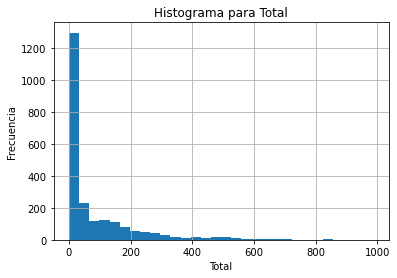

In [5]:
# Histograma para ver la distribución de 'Total'
df['Total'].hist(bins=30)  # Puedes ajustar el número de bins según necesites
plt.title('Histograma para Total')
plt.xlabel('Total')
plt.ylabel('Frecuencia')
plt.show()


### Cambiar el tipo de las variables

In [6]:
df['Causa'] = df['Causa'].astype('category')
df['Entidad federativa'] = df['Entidad federativa'].astype('category')

In [7]:
df.dtypes

Periodo                  int64
Causa                 category
Entidad federativa    category
Total                  float64
Hombres                float64
Mujeres                float64
No especificado          int64
Z-Score                float64
dtype: object

### Visualizacion de data

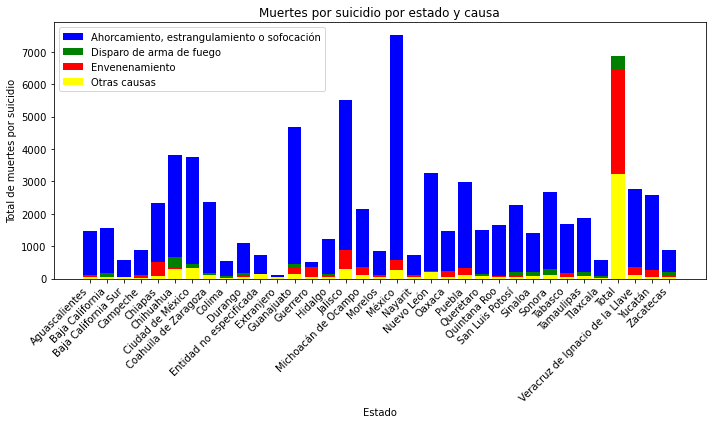

In [8]:
# Agrupamos por 'Entidad federativa' y 'Causa' y sumamos 'Total'
grouped_data = df.groupby(['Entidad federativa', 'Causa'])['Total'].sum().reset_index()

# Creamos la gráfica de barras
plt.figure(figsize=(10, 6))

# Iteramos sobre cada causa para asignar un color diferente
colors = {'Ahorcamiento, estrangulamiento o sofocación': 'blue', 'Disparo de arma de fuego': 'green', 'Envenenamiento': 'red','Otras causas': 'yellow'}
for cause, color in colors.items():
    cause_data = grouped_data[grouped_data['Causa'] == cause]
    plt.bar(cause_data['Entidad federativa'], cause_data['Total'], color=color, label=cause)
plt.xlabel('Estado')
plt.ylabel('Total de muertes por suicidio')
plt.title('Muertes por suicidio por estado y causa')
plt.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Gráfica de los 5 estados con más suicidios por causa 

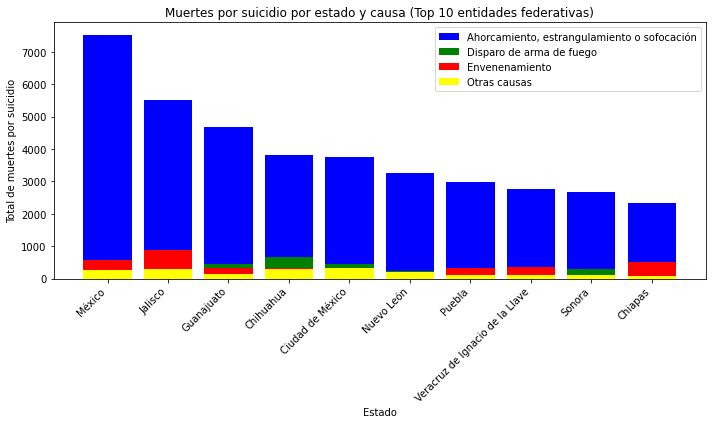

In [9]:
# Agrupamos por 'Entidad federativa' y 'Causa' y sumamos 'Total'
grouped_data = df.groupby(['Entidad federativa', 'Causa'])['Total'].sum().reset_index()

# Excluimos el valor 'Total' de la variable 'Entidad federativa'
grouped_data = grouped_data[grouped_data['Entidad federativa'] != 'Total']

# Seleccionamos las 10 entidades federativas con mayor valor
top_10_states = grouped_data.groupby('Entidad federativa')['Total'].sum().nlargest(10).index

# Filtramos el DataFrame para mantener solo las 10 entidades federativas con mayor valor
grouped_data_top_10 = grouped_data[grouped_data['Entidad federativa'].isin(top_10_states)]

# Creamos la gráfica de barras
plt.figure(figsize=(10, 6))

# Iteramos sobre cada causa para asignar un color diferente
colors = {'Ahorcamiento, estrangulamiento o sofocación': 'blue', 'Disparo de arma de fuego': 'green', 'Envenenamiento': 'red', 'Otras causas': 'yellow'}
for cause, color in colors.items():
    cause_data = grouped_data_top_10[grouped_data_top_10['Causa'] == cause]
    # Ordenamos los datos por el total en orden descendente
    cause_data = cause_data.sort_values(by='Total', ascending=False)
    plt.bar(cause_data['Entidad federativa'], cause_data['Total'], color=color, label=cause)

plt.xlabel('Estado')
plt.ylabel('Total de muertes por suicidio')
plt.title('Muertes por suicidio por estado y causa (Top 10 entidades federativas)')
plt.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Gráfica suicidios por género

C:\Users\cacho\AppData\Local\Temp\ipykernel_21620\4077132496.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_melted = df.melt(id_vars='Causa', value_vars=['Hombres', 'Mujeres'], var_name='Género', value_name='Total')


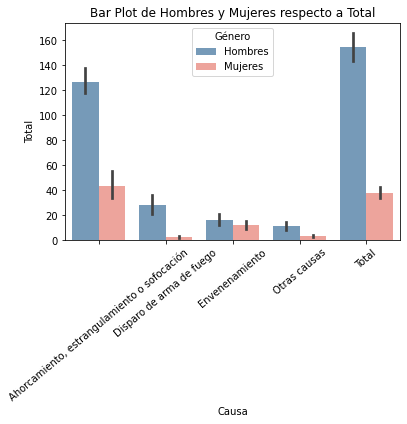

In [10]:
# Crear un DataFrame derretido para el gráfico de barras
df_melted = df.melt(id_vars='Causa', value_vars=['Hombres', 'Mujeres'], var_name='Género', value_name='Total')

# Usar una paleta de colores personalizada o estándar de Seaborn
palette = {'Hombres': 'steelblue', 'Mujeres': 'salmon'}

# Crear un gráfico de barras usando la paleta personalizada
sns.barplot(x="Causa", y="Total", hue="Género", data=df_melted, alpha=0.8, palette=palette)

# Configurar el eje x para mostrar solo enteros
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Girar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=40)  # Girar a 90 grados para etiquetas verticales

# Configurar el título y las etiquetas del gráfico
plt.title("Bar Plot de Hombres y Mujeres respecto a Total")
plt.xlabel("Causa")
plt.ylabel("Total")

# Mostrar el gráfico
plt.show()

### Comportamiento top 5 estados a través del tiempo

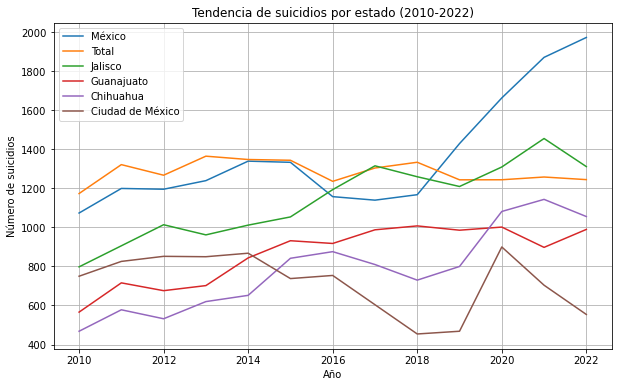

In [11]:
# Agrupar por estado y periodo, sumar los suicidios y ordenar por la suma total
suicidios_por_estado = df.groupby(['Entidad federativa', 'Periodo'])['Total'].sum().reset_index()

# Ordenar por la suma total de suicidios y seleccionar los cinco primeros estados
top_5_estados = suicidios_por_estado.groupby('Entidad federativa')['Total'].sum().nlargest(6).index

# Filtrar el DataFrame para incluir solo los datos de los cinco estados seleccionados
suicidios_top_5 = suicidios_por_estado[suicidios_por_estado['Entidad federativa'].isin(top_5_estados)]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Iterar sobre cada estado y trazar la tendencia lineal
for estado in top_5_estados:
    data_estado = suicidios_top_5[suicidios_top_5['Entidad federativa'] == estado]
    plt.plot(data_estado['Periodo'], data_estado['Total'], label=estado)

# Configurar el título y las etiquetas de los ejes
plt.title('Tendencia de suicidios por estado (2010-2022)')
plt.xlabel('Año')
plt.ylabel('Número de suicidios')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

### Tabla con incrementos promedios de suicidios top 5 estados

In [12]:
# Crear un DataFrame para almacenar los resultados
resultados_promedio = pd.DataFrame(columns=['Estado', 'Incremento Promedio Anual (%)'])

# Iterar sobre cada estado
for estado in top_5_estados:
    # Obtener los datos para el estado actual
    datos_estado = suicidios_top_5[suicidios_top_5['Entidad federativa'] == estado]
    
    # Calcular el incremento anual en porcentaje para cada año dentro del periodo
    incrementos_porcentaje = []
    for año in range(2010, 2022):
        suicidios_actual = datos_estado[datos_estado['Periodo'] == año]['Total'].values[0]
        suicidios_siguiente = datos_estado[datos_estado['Periodo'] == año + 1]['Total'].values[0]
        incremento_porcentaje = ((suicidios_siguiente - suicidios_actual) / suicidios_actual) * 100
        incrementos_porcentaje.append(incremento_porcentaje)
    
    # Calcular el incremento promedio anual en porcentaje
    incremento_promedio = sum(incrementos_porcentaje) / len(incrementos_porcentaje)
    
    # Agregar el resultado al DataFrame
    resultados_promedio = resultados_promedio.append({'Estado': estado, 'Incremento Promedio Anual (%)': incremento_promedio}, ignore_index=True)

# Mostrar los resultados
resultados_promedio

C:\Users\cacho\AppData\Local\Temp\ipykernel_21620\794270307.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados_promedio = resultados_promedio.append({'Estado': estado, 'Incremento Promedio Anual (%)': incremento_promedio}, ignore_index=True)
C:\Users\cacho\AppData\Local\Temp\ipykernel_21620\794270307.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados_promedio = resultados_promedio.append({'Estado': estado, 'Incremento Promedio Anual (%)': incremento_promedio}, ignore_index=True)
C:\Users\cacho\AppData\Local\Temp\ipykernel_21620\794270307.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados_promedio = resultados_promedio.append({'Estado': estado, 'Incremento Promedio Anual (%)': increment

,Estado,Incremento Promedio Anual (%)
0,México,5.595532
1,Total,0.648433
2,Jalisco,4.539181
3,Guanajuato,5.239094
4,Chihuahua,7.991135
5,Ciudad de México,0.827789


### Comportamiento por género a través del tiempo

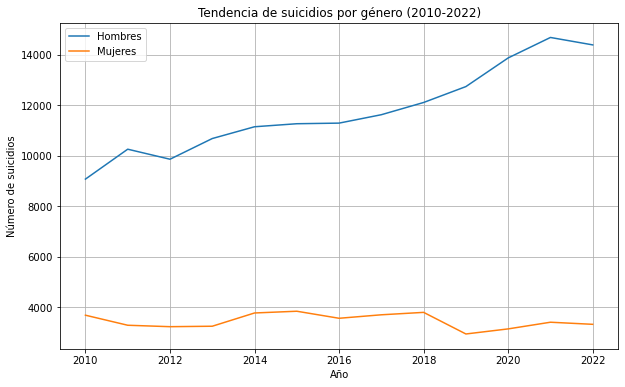

In [13]:
# Filtrar los datos para incluir solo el periodo 2010-2022
df = df[(df['Periodo'] >= 2010) & (df['Periodo'] <= 2022)]

# Agrupar los datos por periodo y sumar los suicidios de hombres y mujeres
suicidios_por_periodo = df.groupby('Periodo')[['Hombres', 'Mujeres']].sum().reset_index()

# Crear la gráfica de tendencia para hombres y mujeres
plt.figure(figsize=(10, 6))
plt.plot(suicidios_por_periodo['Periodo'], suicidios_por_periodo['Hombres'], label='Hombres')
plt.plot(suicidios_por_periodo['Periodo'], suicidios_por_periodo['Mujeres'], label='Mujeres')
plt.title('Tendencia de suicidios por género (2010-2022)')
plt.xlabel('Año')
plt.ylabel('Número de suicidios')
plt.legend()
plt.grid(True)
plt.show()

### Tabla con incrementos promedios de suicidio por genero

In [14]:
# Filtrar los datos para incluir solo el periodo 2010-2022
df = df[(df['Periodo'] >= 2010) & (df['Periodo'] <= 2022)]

# Agrupar los datos por género y sumar los suicidios
suicidios_por_genero = df.groupby('Causa')[['Hombres', 'Mujeres']].sum()

# Calcular el incremento promedio de suicidios para Hombres y Mujeres
incremento_promedio_hombres = ((suicidios_por_genero['Hombres'].iloc[-1] - suicidios_por_genero['Hombres'].iloc[0]) / suicidios_por_genero['Hombres'].iloc[0]) * 100
incremento_promedio_mujeres = ((suicidios_por_genero['Mujeres'].iloc[-1] - suicidios_por_genero['Mujeres'].iloc[0]) / suicidios_por_genero['Mujeres'].iloc[0]) * 100

# Crear un DataFrame para almacenar los resultados
resultados_incremento = pd.DataFrame({
    'Género': ['Hombres', 'Mujeres'],
    'Incremento Promedio (%)': [incremento_promedio_hombres, incremento_promedio_mujeres]
})

# Mostrar los resultados
resultados_incremento

,Género,Incremento Promedio (%)
0,Hombres,21.721411
1,Mujeres,-13.094811


### Distribuciones

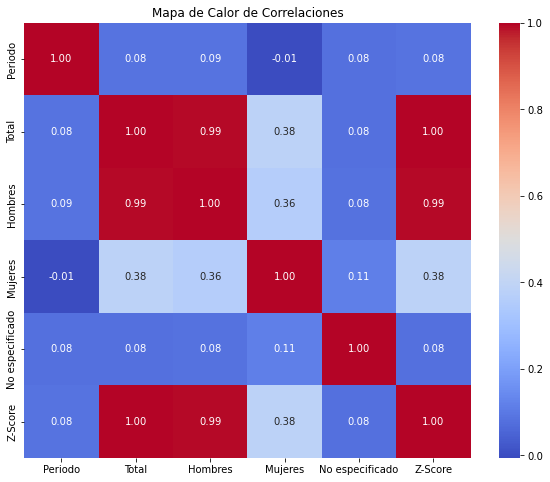

In [15]:
# Función para crear un mapa de calor de correlaciones
def mapa_calor_correlaciones(df):
    columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
    
    if len(columnas_numericas) > 1:
        plt.figure(figsize=(10, 8))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Mapa de Calor de Correlaciones")
        plt.show()
    else:
        print("Se requieren al menos dos variables numéricas para el mapa de calor de correlaciones.")

mapa_calor_correlaciones(df)


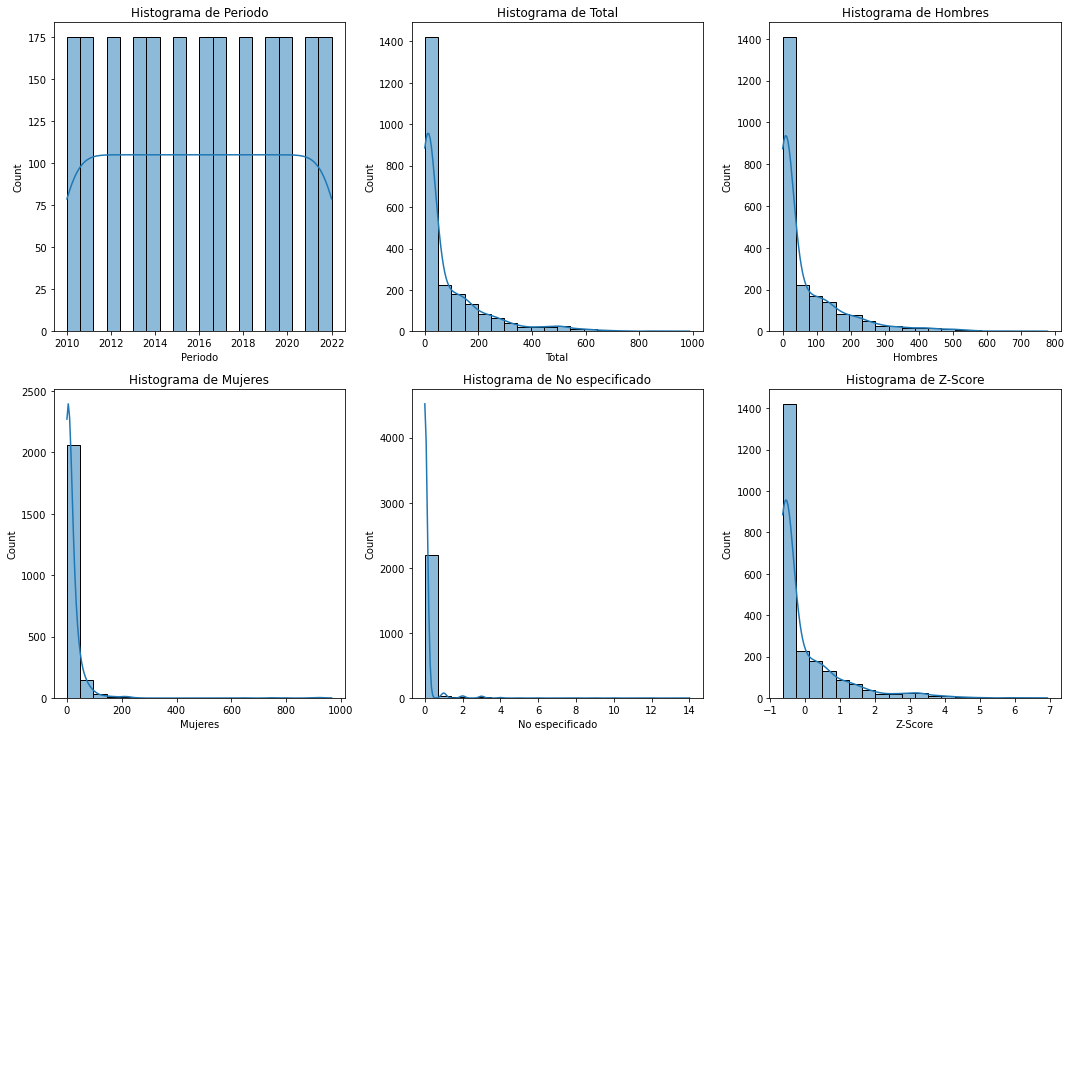

In [16]:
# Función para generar y exportar histogramas para variables numéricas
def crear_histogramas(df, kde=True, bins=20, output_file=None):
    columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
    n_cols = len(columnas_numericas)
    
    # Definir el número de filas y columnas para la cuadrícula
    nrows = 3  # Número de filas
    ncols = 3  # Número de columnas

    # Ajustar el tamaño del gráfico en función del número de filas y columnas
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))

    # Asegurarse de que axes sea un array plano para un fácil acceso
    axes = axes.flatten()

    # Crear histogramas para todas las variables numéricas
    for i, col in enumerate(columnas_numericas):
        sns.histplot(df[col], kde=kde, bins=bins, ax=axes[i])
        axes[i].set_title(f'Histograma de {col}')
    
    # Eliminar los ejes no utilizados si hay menos datos que la cuadrícula
    if n_cols < nrows * ncols:
        for j in range(n_cols, nrows * ncols):
            axes[j].axis('off')  # Desactivar ejes no utilizados
    
    plt.tight_layout()

    # Exportar el gráfico a un archivo si se proporciona un nombre de archivo
    if output_file:
        plt.savefig(output_file)  # Guardar el plot antes de plt.show()

    # Mostrar el plot
    plt.show()

# Ejemplo de uso
crear_histogramas(df, output_file='histogramas_3x3.png')  # Exporta a un archivo PNG


### SEGUNDA BASE

In [17]:
import pandas as pd

In [18]:
df1 = pd.read_csv('C:/Users/cacho/Downloads/base_edades.csv')
df1

,periodo,causa,entidad_federativa,edades_grp,total,hombres,mujeres,no_especificado
0,2010,Total,Aguascalientes,5 a 9 años,0,0,0,0
1,2010,Total,Aguascalientes,10 a 14 años,1,0,1,0
2,2010,Total,Aguascalientes,15 a 19 años,7,3,4,0
3,2010,Total,Aguascalientes,20 a 24 años,12,12,0,0
4,2010,Total,Aguascalientes,25 a 29 años,6,6,0,0
...,...,...,...,...,...,...,...,...
7717,2022,Total,Extranjero,70 a 74 años,0,0,0,0
7718,2022,Total,Extranjero,75 a 79 años,0,0,0,0
7719,2022,Total,Extranjero,80 a 84 años,0,0,0,0
7720,2022,Total,Extranjero,85 años y más,0,0,0,0


In [19]:
df1.dtypes

periodo                int64
causa                 object
entidad_federativa    object
edades_grp            object
total                  int64
hombres                int64
mujeres                int64
no_especificado        int64
dtype: object

### Cambiar la codificacion del grupo de edades

In [20]:
# Suponiendo que df1 es tu DataFrame
valores_unicos = df1["edades_grp"].unique()
print("Valores únicos:", valores_unicos)

Valores únicos: ['5 a 9 años' '10 a 14 años' '15 a 19 años' '20 a 24 años' '25 a 29 años'
 '30 a 34 años' '35 a 39 años' '40 a 44 años' '45 a 49 años'
 '50 a 54 años' '55 a 59 años' '60 a 64 años' '65 a 69 años'
 '70 a 74 años' '75 a 79 años' '80 a 84 años' '85 años y más'
 'No especificado']


In [21]:
# Crear un diccionario de codificación
codificacion = {valor: idx for idx, valor in enumerate(sorted(valores_unicos), 1)}
print("Diccionario de codificación:", codificacion)

Diccionario de codificación: {'10 a 14 años': 1, '15 a 19 años': 2, '20 a 24 años': 3, '25 a 29 años': 4, '30 a 34 años': 5, '35 a 39 años': 6, '40 a 44 años': 7, '45 a 49 años': 8, '5 a 9 años': 9, '50 a 54 años': 10, '55 a 59 años': 11, '60 a 64 años': 12, '65 a 69 años': 13, '70 a 74 años': 14, '75 a 79 años': 15, '80 a 84 años': 16, '85 años y más': 17, 'No especificado': 18}


In [22]:
# Crear una nueva columna con valores codificados
df1["edades_grp_codificado"] = df1["edades_grp"].map(codificacion)

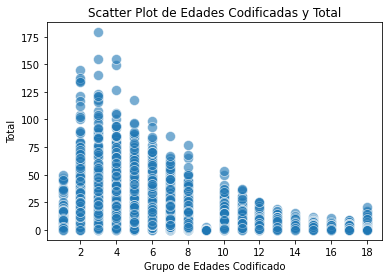

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Crear un gráfico de dispersión donde el eje x muestra solo enteros
sns.scatterplot(x="edades_grp_codificado", y="total", data=df1, alpha=0.6, s=100)

# Configurar el eje x para que muestre solo enteros
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title("Scatter Plot de Edades Codificadas y Total")
plt.xlabel("Grupo de Edades Codificado")
plt.ylabel("Total")
plt.show()


In [24]:
# Diccionario de pesos por grupo de edades
pesos_edades = {
    2: 0.3,  # 15 a 19 años
    3: 0.3,  # 20 a 24 años
    4: 0.3,  # 25 a 29 años
    5: 0.2,  # 30 a 34 años
    6: 0.2,  # 35 a 39 años
    1: 0.1,  # 10 a 14 años
    7: 0.1,  # 40 a 44 años
    8: 0.1,  # 45 a 49 años
    9: 0.1,  # 5 a 9 años
    10: 0.1, # 50 a 54 años
    11: 0.1, # 55 a 59 años
    12: 0.1, # 60 a 64 años
    13: 0.1, # 65 a 69 años
    14: 0.1, # 70 a 74 años
    15: 0.1, # 75 a 79 años
    16: 0.1, # 80 a 84 años
    17: 0.1, # 85 años y más
    18: 0.1  # No especificado
}

# Paso 2: Calcular la suma de "total" por grupo de edades y normalizar
suma_total_por_grupo = df1.groupby("edades_grp_codificado")["total"].sum()
suma_total_normalizada = suma_total_por_grupo / suma_total_por_grupo.sum()

# Paso 3: Crear la nueva columna de probabilidad
df1["probabilidad_suicidio"] = df1["edades_grp_codificado"].map(pesos_edades) * df1["edades_grp_codificado"].map(suma_total_normalizada)

# Paso 4: Verificar la nueva columna
print(df1[["edades_grp_codificado", "total", "probabilidad_suicidio"]].head())


   edades_grp_codificado  total  probabilidad_suicidio
0                      9      0               0.000009
1                      1      1               0.003388
2                      2      7               0.036898
3                      3     12               0.045722
4                      4      6               0.040214


### Modelado

#### Armar la estructura de filtrados

In [25]:
filtered_df1 = df[(df['Periodo'].between(2010, 2022)) & 
                 (df['Entidad federativa'] == 'Aguascalientes') & 
                 (df['Causa'] == 'Total')]

filtered_df1

,Periodo,Causa,Entidad federativa,Total,Hombres,Mujeres,No especificado,Z-Score
1,2010,Total,Aguascalientes,50.0,41.0,9.0,0,-0.256001
176,2011,Total,Aguascalientes,98.0,81.0,17.0,0,0.112344
351,2012,Total,Aguascalientes,116.0,95.0,21.0,0,0.250473
526,2013,Total,Aguascalientes,113.0,90.0,23.0,0,0.227451
701,2014,Total,Aguascalientes,110.0,86.0,24.0,0,0.204430
876,2015,Total,Aguascalientes,124.0,102.0,22.0,0,0.311863
1051,2016,Total,Aguascalientes,125.0,102.0,23.0,0,0.319537
1226,2017,Total,Aguascalientes,140.0,115.0,25.0,0,0.434645
1401,2018,Total,Aguascalientes,140.0,114.0,26.0,0,0.434645
1576,2019,Total,Aguascalientes,157.0,129.0,28.0,0,0.565100


#### Generar funcion a partir de estructura de filtro

In [26]:
# Define a function to create filtered DataFrames for each unique 'Entidad federativa'
def create_filtered_dfs(df):
    # Get unique values in 'Entidad federativa'
    unique_entidades = df['Entidad federativa'].unique()

    # Dictionary to store filtered DataFrames
    filtered_dfs = {}

    # Loop through unique values and create filtered DataFrames
    for entidad in unique_entidades:
        filtered_df = df[(df['Periodo'].between(2010, 2022)) & 
                         (df['Entidad federativa'] == entidad) & 
                         (df['Causa'] == 'Total')]
        
        # Store the filtered DataFrame in the dictionary
        filtered_dfs[entidad] = filtered_df
    
    return filtered_dfs

# Call the function and get the filtered DataFrames
filtered_dfs = create_filtered_dfs(df)

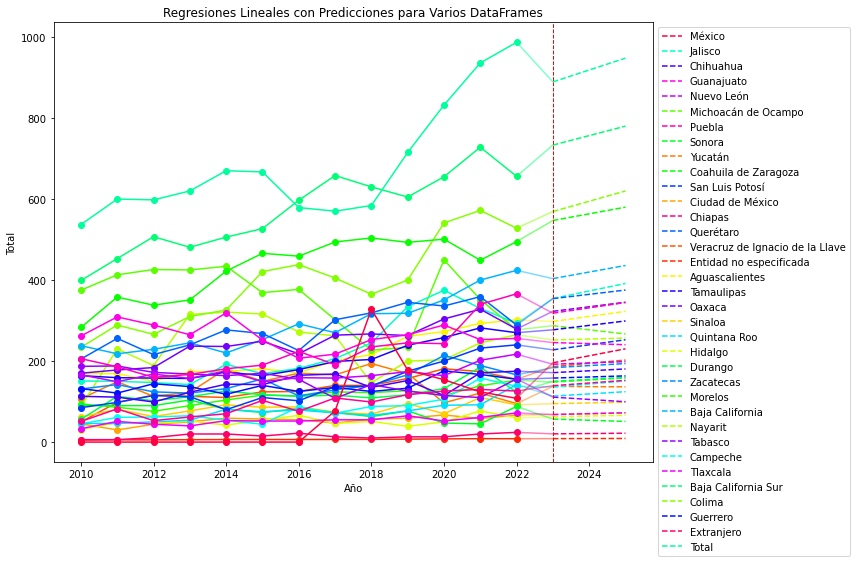

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Lista de entidades federativas
entidades = [
    "Total", "Aguascalientes", "Baja California", "Baja California Sur", "Campeche",
    "Coahuila de Zaragoza", "Colima", "Chiapas", "Chihuahua", "Ciudad de México",
    "Durango", "Guanajuato", "Guerrero", "Hidalgo", "Jalisco", "México",
    "Michoacán de Ocampo", "Morelos", "Nayarit", "Nuevo León", "Oaxaca", "Puebla",
    "Querétaro", "Quintana Roo", "San Luis Potosí", "Sinaloa", "Sonora", "Tabasco",
    "Tamaulipas", "Tlaxcala", "Veracruz de Ignacio de la Llave", "Yucatán", "Zacatecas",
    "Extranjero", "Entidad no especificada"
]

# Generar un diccionario de colores para cada entidad federativa
palette = sns.color_palette("hsv", len(entidades))
entity_colors = {entidad: color for entidad, color in zip(entidades, palette)}

# Diccionario para almacenar los valores finales de las predicciones y sus etiquetas
prediction_values = {}

# Crear un solo gráfico para mostrar resultados múltiples
plt.figure(figsize=(12, 8))  # Tamaño del gráfico

# Iterar sobre cada DataFrame para plotear y predecir
for name, df in filtered_dfs.items():
    # Obtener el color correspondiente a la entidad federativa
    color = entity_colors.get(name, "black")

    # Convertir 'Periodo' a datetime y extraer el año como número
    df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y')
    df['Year_numeric'] = df['Periodo'].dt.year

    # Crear y entrenar el modelo de regresión lineal
    linear_reg = LinearRegression()
    X = df[['Year_numeric']]
    y = df['Total']
    linear_reg.fit(X, y)

    # Predecir para los próximos tres años
    future_years = pd.DataFrame({
        'Year_numeric': [2023, 2024, 2025]
    })
    future_predictions = linear_reg.predict(future_years)

    # Guardar el valor de la última predicción para ordenar la leyenda
    prediction_values[name] = future_predictions[-1]  # Último valor de la predicción

    # Crear un DataFrame con las predicciones futuras
    predictions_df = pd.DataFrame({
        'Periodo': pd.to_datetime(future_years['Year_numeric'], format='%Y'),
        'Predicted_Total': future_predictions
    })

    # Añadir las series originales y las predicciones al gráfico usando el mismo color
    plt.plot(df['Year_numeric'], df['Total'], marker='o', linestyle='-', color=color)
    plt.plot(predictions_df['Periodo'].dt.year, predictions_df['Predicted_Total'], linestyle='--', color=color, label=f'{name} - Predicciones')

    # Conectar el último punto de datos históricos con el primer punto de predicciones futuras
    plt.plot(
        [df['Year_numeric'].iloc[-1], predictions_df['Periodo'].dt.year.iloc[0]], 
        [df['Total'].iloc[-1], predictions_df['Predicted_Total'].iloc[0]], 
        linestyle='-', color=color, alpha=0.5
    )

# Ordenar las etiquetas de la leyenda según los valores de predicciones
legend_labels = sorted(prediction_values.items(), key=lambda x: x[1], reverse=True)  # Ordenar por valor

# Agregar las leyendas ordenadas al gráfico
handles, _ = plt.gca().get_legend_handles_labels()  # Obtener las handles originales
sorted_handles = [handles[[label[0] for label in legend_labels].index(name)] for name in prediction_values.keys()]  # Ordenar las handles

plt.legend(sorted_handles, [label[0] for label in legend_labels], loc='upper left', bbox_to_anchor=(1, 1))  # Leyenda ordenada y fuera del área de trazado

# Agregar la línea vertical roja para indicar el período 2023
plt.axvline(x=2023, color='red', linestyle='--', linewidth=1, label='Inicio de predicciones (2023)')

# Configuración del gráfico
plt.xlabel('Año')
plt.ylabel('Total')
plt.title('Regresiones Lineales con Predicciones para Varios DataFrames')

plt.tight_layout()  # Ajustar la disposición para evitar solapamientos
plt.show()  # Mostrar el gráfico completo


In [28]:
pip install ipyleaflet ipywidgets 


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import numpy as np
import pandas as pd
import folium
from IPython.display import display, IFrame

# Lista de entidades federativas y coordenadas
entidades_coords = {
    "México": [19.4326, -99.1332],
    "Jalisco": [20.6597, -103.3496],
    "Guanajuato": [21.0190, -101.6845],
    "Chihuahua": [28.6353, -106.0766],
    "Ciudad de México": [19.4326, -99.1332],
    "Aguascalientes": [21.8853, -102.2916],
    "Baja California": [32.7157, -117.1611],
    "Baja California Sur": [24.1444, -110.3005],
    "Campeche": [19.8301, -90.5349],
    "Coahuila de Zaragoza": [27.0587, -101.7068],
    "Colima": [19.2452, -103.724],
    "Chiapas": [16.7530, -93.1169],
    "Durango": [24.0277, -104.6532],
    "Guerrero": [17.4392, -99.5451],
    "Hidalgo": [20.1011, -98.7591],
    "Michoacán de Ocampo": [19.5665, -101.7068],
    "Morelos": [18.6813, -99.1013],
    "Nayarit": [21.7514, -104.8455],
    "Nuevo León": [25.6866, -100.3161],
    "Oaxaca": [17.0732, -96.7266],
    "Puebla": [19.0414, -98.2063],
    "Querétaro": [20.5888, -100.3899],
    "Quintana Roo": [19.1817, -88.4791],
    "San Luis Potosí": [22.1566, -100.9855],
    "Sinaloa": [24.8056, -107.3957],
    "Sonora": [29.0729, -110.9559],
    "Tabasco": [17.8409, -92.6189],
    "Tamaulipas": [23.7369, -99.1411],
    "Tlaxcala": [19.3139, -98.2404],
    "Veracruz de Ignacio de la Llave": [19.1738, -96.1342],
    "Yucatán": [20.6768, -89.5713],
    "Zacatecas": [22.7709, -102.5832]
}

# Diccionario para almacenar los datos de 2021 y 2022
data_by_year = {2021: {}, 2022: {}}

# Iterar sobre cada DataFrame para comparar 2021 y 2022
for name, df in filtered_dfs.items():
    # Convertir 'Periodo' a datetime y extraer el año como número
    df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y')
    df['Year_numeric'] = df['Periodo'].dt.year

    # Filtrar datos para 2021 y 2022
    data_2021 = df[df['Year_numeric'] == 2021]['Total'].sum()
    data_2022 = df[df['Year_numeric'] == 2022]['Total'].sum()

    # Guardar los datos en el diccionario
    data_by_year[2021][name] = data_2021
    data_by_year[2022][name] = data_2022

# Crear un mapa para comparar 2021 y 2022
m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)
print("Comparación de crecimiento entre 2021 y 2022:")

for state in data_by_year[2021].keys():
    value_2021 = data_by_year[2021].get(state, 0)
    value_2022 = data_by_year[2022].get(state, 0)
    growth = value_2022 - value_2021

    # Imprimir el crecimiento
    print(f"{state}: Crecimiento de {growth:.2f}")

    # Determinar el color basado en el crecimiento
    if growth >= 10:
        color = 'red'  # Rojo para crecimiento mayor o igual a 10
    elif 0 < growth < 10:
        color = 'yellow'  # Amarillo para crecimiento entre 0 y 10
    else:
        color = 'green'  # Verde para decrecimiento o crecimiento negativo

    # Añadir un círculo al mapa
    if state in entidades_coords:
        folium.Circle(
            location=entidades_coords[state],
            radius=50000,  # Ajustar el radio según sea necesario
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=f"{state}: {growth:.2f}"   
        ).add_to(m)
    else:
        print(f"Coordenadas para {state} no están disponibles. Se omitirá.")

# Guardar el mapa como un archivo HTML
m.save("mexico_growth_2021_2022.html")
display(IFrame("mexico_growth_2021_2022.html", width=700, height=500))


Comparación de crecimiento entre 2021 y 2022:
Total: Crecimiento de -0.19
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: Crecimiento de -19.00
Baja California: Crecimiento de -26.00
Baja California Sur: Crecimiento de 9.00
Campeche: Crecimiento de -18.00
Coahuila de Zaragoza: Crecimiento de 9.00
Colima: Crecimiento de -17.00
Chiapas: Crecimiento de 20.00
Chihuahua: Crecimiento de -44.00
Ciudad de México: Crecimiento de -75.00
Durango: Crecimiento de 14.00
Guanajuato: Crecimiento de 46.00
Guerrero: Crecimiento de 43.00
Hidalgo: Crecimiento de -62.00
Jalisco: Crecimiento de -72.00
México: Crecimiento de 51.00
Michoacán de Ocampo: Crecimiento de -37.00
Morelos: Crecimiento de -20.00
Nayarit: Crecimiento de 50.00
Nuevo León: Crecimiento de 24.00
Oaxaca: Crecimiento de -23.00
Puebla: Crecimiento de -70.00
Querétaro: Crecimiento de 8.00
Quintana Roo: Crecimiento de -12.00
San Luis Potosí: Crecimiento de -12.00
Sinaloa: Crecimiento de 4.00
Sonora: Crecimiento de -49.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import folium
from folium.plugins import HeatMap
from matplotlib.colors import LinearSegmentedColormap

# Lista de entidades federativas y coordenadas
entidades_coords = {
    "México": [19.4326, -99.1332],
    "Jalisco": [20.6597, -103.3496],
    "Guanajuato": [21.0190, -101.6845],
    "Chihuahua": [28.6353, -106.0766],
    "Ciudad de México": [19.4326, -99.1332],
    "Aguascalientes": [21.8853, -102.2916],
    "Baja California": [32.7157, -117.1611],
    "Baja California Sur": [24.1444, -110.3005],
    "Campeche": [19.8301, -90.5349],
    "Coahuila de Zaragoza": [27.0587, -101.7068],
    "Colima": [19.2452, -103.724],
    "Chiapas": [16.7530, -93.1169],
    "Durango": [24.0277, -104.6532],
    "Guerrero": [17.4392, -99.5451],
    "Hidalgo": [20.1011, -98.7591],
    "Michoacán de Ocampo": [19.5665, -101.7068],
    "Morelos": [18.6813, -99.1013],
    "Nayarit": [21.7514, -104.8455],
    "Nuevo León": [25.6866, -100.3161],
    "Oaxaca": [17.0732, -96.7266],
    "Puebla": [19.0414, -98.2063],
    "Querétaro": [20.5888, -100.3899],
    "Quintana Roo": [19.1817, -88.4791],
    "San Luis Potosí": [22.1566, -100.9855],
    "Sinaloa": [24.8056, -107.3957],
    "Sonora": [29.0729, -110.9559],
    "Tabasco": [17.8409, -92.6189],
    "Tamaulipas": [23.7369, -99.1411],
    "Tlaxcala": [19.3139, -98.2404],
    "Veracruz de Ignacio de la Llave": [19.1738, -96.1342],
    "Yucatán": [20.6768, -89.5713],
    "Zacatecas": [22.7709, -102.5832]
}

# Diccionario para almacenar los valores finales de las predicciones y sus etiquetas
prediction_values = {}

# Crear un solo gráfico para mostrar resultados múltiples
plt.figure(figsize=(12, 8))  # Tamaño del gráfico

# Iterar sobre cada DataFrame para plotear y predecir
for name, df in filtered_dfs.items():
    # Convertir 'Periodo' a datetime y extraer el año como número
    df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y')
    df['Year_numeric'] = df['Periodo'].dt.year

    # Crear y entrenar el modelo de regresión lineal
    linear_reg = LinearRegression()
    X = df[['Year_numeric']]
    y = df['Total']
    linear_reg.fit(X, y)

    # Predecir para los próximos tres años
    future_years = pd.DataFrame({
        'Year_numeric': [2023, 2024, 2025]
    })
    future_predictions = linear_reg.predict(future_years)

    # Guardar el valor de la última predicción para ordenar la leyenda
    prediction_values[name] = future_predictions[-1]  # Último valor de la predicción

# Crear un DataFrame con las predicciones finales
prediction_df = pd.DataFrame(list(prediction_values.items()), columns=['State', 'Prediction'])

# Crear el mapa base centrado en México
m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)

# Filtrar las predicciones que tienen coordenadas
filtered_predictions = {state: prediction for state, prediction in prediction_values.items() if state in entidades_coords}

# Crear una lista de puntos con las predicciones
heat_data = [
    [entidades_coords[state][0], entidades_coords[state][1], prediction]
    for state, prediction in filtered_predictions.items()
]

# Crear el mapa de calor
HeatMap(heat_data, max_value=max(filtered_predictions.values()), radius=50).add_to(m)

# Crear un mapa de colores de rojo a verde
cmap = LinearSegmentedColormap.from_list('red_green', ['red', 'yellow', 'green'])

# Agregar las predicciones al mapa con círculos y colores escalados
for state, prediction in filtered_predictions.items():
    # Escalar el color basado en la predicción
    normalized_prediction = prediction / max(filtered_predictions.values())
    color = cmap(normalized_prediction)
    color = f'#{int(color[0]*255):02x}{int(color[1]*255):02x}{int(color[2]*255):02x}'
    
    folium.Circle(
        location=entidades_coords[state],
        radius=50000,  # Ajustar el radio según sea necesario
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"{state}: {prediction:.2f}"
    ).add_to(m)

# Guardar el mapa como un archivo HTML
m.save("mexico_heatmap.html")

# Mostrar el mapa
m


<Figure size 864x576 with 0 Axes>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import folium
from folium.plugins import HeatMap
from matplotlib.colors import LinearSegmentedColormap

# Lista de entidades federativas y coordenadas
entidades_coords = {
    "México": [19.4326, -99.1332],
    "Jalisco": [20.6597, -103.3496],
    "Guanajuato": [21.0190, -101.6845],
    "Chihuahua": [28.6353, -106.0766],
    "Ciudad de México": [19.4326, -99.1332],
    "Aguascalientes": [21.8853, -102.2916],
    "Baja California": [32.7157, -117.1611],
    "Baja California Sur": [24.1444, -110.3005],
    "Campeche": [19.8301, -90.5349],
    "Coahuila de Zaragoza": [27.0587, -101.7068],
    "Colima": [19.2452, -103.724],
    "Chiapas": [16.7530, -93.1169],
    "Durango": [24.0277, -104.6532],
    "Guerrero": [17.4392, -99.5451],
    "Hidalgo": [20.1011, -98.7591],
    "Michoacán de Ocampo": [19.5665, -101.7068],
    "Morelos": [18.6813, -99.1013],
    "Nayarit": [21.7514, -104.8455],
    "Nuevo León": [25.6866, -100.3161],
    "Oaxaca": [17.0732, -96.7266],
    "Puebla": [19.0414, -98.2063],
    "Querétaro": [20.5888, -100.3899],
    "Quintana Roo": [19.1817, -88.4791],
    "San Luis Potosí": [22.1566, -100.9855],
    "Sinaloa": [24.8056, -107.3957],
    "Sonora": [29.0729, -110.9559],
    "Tabasco": [17.8409, -92.6189],
    "Tamaulipas": [23.7369, -99.1411],
    "Tlaxcala": [19.3139, -98.2404],
    "Veracruz de Ignacio de la Llave": [19.1738, -96.1342],
    "Yucatán": [20.6768, -89.5713],
    "Zacatecas": [22.7709, -102.5832]
}

# Diccionario para almacenar los valores finales de las predicciones y sus etiquetas
prediction_values = {}

# Crear un solo gráfico para mostrar resultados múltiples
plt.figure(figsize=(12, 8))  # Tamaño del gráfico

# Iterar sobre cada DataFrame para plotear y predecir
for name, df in filtered_dfs.items():
    # Convertir 'Periodo' a datetime y extraer el año como número
    df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y')
    df['Year_numeric'] = df['Periodo'].dt.year

    # Crear y entrenar el modelo de regresión lineal
    linear_reg = LinearRegression()
    X = df[['Year_numeric']]
    y = df['Total']
    linear_reg.fit(X, y)

    # Predecir para los próximos tres años
    future_years = pd.DataFrame({
        'Year_numeric': [2023, 2024, 2025]
    })
    future_predictions = linear_reg.predict(future_years)

    # Guardar el valor de la última predicción para ordenar la leyenda
    prediction_values[name] = future_predictions[-1]  # Último valor de la predicción

# Obtener el máximo de todas las predicciones
max_prediction = max(prediction_values.values())

# Crear el mapa base centrado en México
m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)

# Filtrar las predicciones que tienen coordenadas
filtered_predictions = {state: prediction for state, prediction in prediction_values.items() if state in entidades_coords}

# Crear una lista de puntos con las predicciones
for state, prediction in filtered_predictions.items():
    # Escalar el color basado en la predicción
    normalized_prediction = prediction / max_prediction
    color = cmap(normalized_prediction)
    color = f'#{int(color[0]*255):02x}{int(color[1]*255):02x}{int(color[2]*255):02x}'
    
    folium.Circle(
        location=entidades_coords[state],
        radius=50000,  # Ajustar el radio según sea necesario
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"{state}: {prediction:.2f}"   
    ).add_to(m)

# Guardar el mapa como un archivo HTML
m.save("mexico_map.html")

# Mostrar el mapa
m


<Figure size 864x576 with 0 Axes>

### Mapa con slider

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import folium
from folium.plugins import HeatMap
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display, IFrame

# Lista de entidades federativas y coordenadas
entidades_coords = {
    "México": [19.4326, -99.1332],
    "Jalisco": [20.6597, -103.3496],
    "Guanajuato": [21.0190, -101.6845],
    "Chihuahua": [28.6353, -106.0766],
    "Ciudad de México": [19.4326, -99.1332],
    "Aguascalientes": [21.8853, -102.2916],
    "Baja California": [32.7157, -117.1611],
    "Baja California Sur": [24.1444, -110.3005],
    "Campeche": [19.8301, -90.5349],
    "Coahuila de Zaragoza": [27.0587, -101.7068],
    "Colima": [19.2452, -103.724],
    "Chiapas": [16.7530, -93.1169],
    "Durango": [24.0277, -104.6532],
    "Guerrero": [17.4392, -99.5451],
    "Hidalgo": [20.1011, -98.7591],
    "Michoacán de Ocampo": [19.5665, -101.7068],
    "Morelos": [18.6813, -99.1013],
    "Nayarit": [21.7514, -104.8455],
    "Nuevo León": [25.6866, -100.3161],
    "Oaxaca": [17.0732, -96.7266],
    "Puebla": [19.0414, -98.2063],
    "Querétaro": [20.5888, -100.3899],
    "Quintana Roo": [19.1817, -88.4791],
    "San Luis Potosí": [22.1566, -100.9855],
    "Sinaloa": [24.8056, -107.3957],
    "Sonora": [29.0729, -110.9559],
    "Tabasco": [17.8409, -92.6189],
    "Tamaulipas": [23.7369, -99.1411],
    "Tlaxcala": [19.3139, -98.2404],
    "Veracruz de Ignacio de la Llave": [19.1738, -96.1342],
    "Yucatán": [20.6768, -89.5713],
    "Zacatecas": [22.7709, -102.5832]
}

# Diccionario para almacenar las predicciones por año y por entidad
predictions_by_year = {2023: {}, 2024: {}, 2025: {}}

# Crear un solo gráfico para mostrar resultados múltiples
plt.figure(figsize=(12, 8))  # Tamaño del gráfico

# Iterar sobre cada DataFrame para plotear y predecir
for name, df in filtered_dfs.items():
    # Convertir 'Periodo' a datetime y extraer el año como número
    df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y')
    df['Year_numeric'] = df['Periodo'].dt.year

    # Crear y entrenar el modelo de regresión lineal
    linear_reg = LinearRegression()
    X = df[['Year_numeric']]
    y = df['Total']
    linear_reg.fit(X, y)

    # Predecir para los próximos tres años
    future_years = pd.DataFrame({
        'Year_numeric': [2023, 2024, 2025]
    })
    future_predictions = linear_reg.predict(future_years)

    # Guardar las predicciones en el diccionario
    for year, prediction in zip([2023, 2024, 2025], future_predictions):
        predictions_by_year[year][name] = prediction

# Obtener el máximo de todas las predicciones para normalizar los colores
max_prediction = max(max(year_predictions.values()) for year_predictions in predictions_by_year.values())

# Crear mapas por año
for year in [2023, 2024, 2025]:
    m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)
    print(f"Predicciones para {year}:")
    
    for state, prediction in predictions_by_year[year].items():
        # Imprimir la predicción
        print(f"{state}: {prediction:.2f}")
        
        # Escalar el color basado en la predicción
        normalized_prediction = prediction / max_prediction
        color = cmap(normalized_prediction)
        color = f'#{int(color[0]*255):02x}{int(color[1]*255):02x}{int(color[2]*255):02x}'
        
        # Añadir un círculo al mapa
        if state in entidades_coords:
            folium.Circle(
                location=entidades_coords[state],
                radius=50000,  # Ajustar el radio según sea necesario
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.6,
                popup=f"{state}: {prediction:.2f}"   
            ).add_to(m)
        else:
            print(f"Coordenadas para {state} no están disponibles. Se omitirá.")

    # Guardar el mapa como un archivo HTML
    m.save(f"mexico_map_{year}.html")
    display(IFrame(f"mexico_map_{year}.html", width=700, height=500))


Predicciones para 2023:
Total: 8.47
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: 186.31
Baja California: 137.46
Baja California Sur: 67.96
Campeche: 94.81
Coahuila de Zaragoza: 297.81
Colima: 62.69
Chiapas: 252.00
Chihuahua: 569.27
Ciudad de México: 287.35
Durango: 148.08
Guanajuato: 547.04
Guerrero: 56.85
Hidalgo: 150.15
Jalisco: 733.23
México: 889.31
Michoacán de Ocampo: 354.42
Morelos: 135.65
Nayarit: 113.38
Nuevo León: 403.62
Oaxaca: 183.73
Puebla: 354.15
Querétaro: 227.69
Quintana Roo: 158.04
San Luis Potosí: 277.15
Sinaloa: 171.42
Sonora: 322.81
Tabasco: 111.00
Tamaulipas: 192.19
Tlaxcala: 68.00
Veracruz de Ignacio de la Llave: 245.73
Yucatán: 318.19
Zacatecas: 139.19
Extranjero: 20.35
Coordenadas para Extranjero no están disponibles. Se omitirá.
Entidad no especificada: 195.73
Coordenadas para Entidad no especificada no están disponibles. Se omitirá.


Predicciones para 2024:
Total: 8.73
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: 194.43
Baja California: 136.93
Baja California Sur: 70.03
Campeche: 96.73
Coahuila de Zaragoza: 310.31
Colima: 64.37
Chiapas: 254.45
Chihuahua: 594.60
Ciudad de México: 277.18
Durango: 153.19
Guanajuato: 563.51
Guerrero: 53.92
Hidalgo: 154.89
Jalisco: 756.64
México: 918.60
Michoacán de Ocampo: 373.01
Morelos: 143.29
Nayarit: 118.91
Nuevo León: 419.79
Oaxaca: 188.84
Puebla: 364.77
Querétaro: 240.18
Quintana Roo: 160.75
San Luis Potosí: 288.11
Sinaloa: 176.00
Sonora: 334.01
Tabasco: 105.31
Tamaulipas: 195.44
Tlaxcala: 70.19
Veracruz de Ignacio de la Llave: 243.08
Yucatán: 331.41
Zacatecas: 145.85
Extranjero: 21.13
Coordenadas para Extranjero no están disponibles. Se omitirá.
Entidad no especificada: 213.04
Coordenadas para Entidad no especificada no están disponibles. Se omitirá.


Predicciones para 2025:
Total: 8.99
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: 202.55
Baja California: 136.41
Baja California Sur: 72.10
Campeche: 98.64
Coahuila de Zaragoza: 322.81
Colima: 66.05
Chiapas: 256.90
Chihuahua: 619.94
Ciudad de México: 267.01
Durango: 158.30
Guanajuato: 579.97
Guerrero: 51.00
Hidalgo: 159.63
Jalisco: 780.04
México: 947.90
Michoacán de Ocampo: 391.60
Morelos: 150.92
Nayarit: 124.44
Nuevo León: 435.97
Oaxaca: 193.94
Puebla: 375.38
Querétaro: 252.66
Quintana Roo: 163.46
San Luis Potosí: 299.07
Sinaloa: 180.58
Sonora: 345.21
Tabasco: 99.62
Tamaulipas: 198.69
Tlaxcala: 72.37
Veracruz de Ignacio de la Llave: 240.42
Yucatán: 344.62
Zacatecas: 152.50
Extranjero: 21.92
Coordenadas para Extranjero no están disponibles. Se omitirá.
Entidad no especificada: 230.36
Coordenadas para Entidad no especificada no están disponibles. Se omitirá.


<Figure size 864x576 with 0 Axes>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import folium
from folium.plugins import HeatMap
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display, IFrame

# Lista de entidades federativas y coordenadas
entidades_coords = {
    "México": [19.4326, -99.1332],
    "Jalisco": [20.6597, -103.3496],
    "Guanajuato": [21.0190, -101.6845],
    "Chihuahua": [28.6353, -106.0766],
    "Ciudad de México": [19.4326, -99.1332],
    "Aguascalientes": [21.8853, -102.2916],
    "Baja California": [32.7157, -117.1611],
    "Baja California Sur": [24.1444, -110.3005],
    "Campeche": [19.8301, -90.5349],
    "Coahuila de Zaragoza": [27.0587, -101.7068],
    "Colima": [19.2452, -103.724],
    "Chiapas": [16.7530, -93.1169],
    "Durango": [24.0277, -104.6532],
    "Guerrero": [17.4392, -99.5451],
    "Hidalgo": [20.1011, -98.7591],
    "Michoacán de Ocampo": [19.5665, -101.7068],
    "Morelos": [18.6813, -99.1013],
    "Nayarit": [21.7514, -104.8455],
    "Nuevo León": [25.6866, -100.3161],
    "Oaxaca": [17.0732, -96.7266],
    "Puebla": [19.0414, -98.2063],
    "Querétaro": [20.5888, -100.3899],
    "Quintana Roo": [19.1817, -88.4791],
    "San Luis Potosí": [22.1566, -100.9855],
    "Sinaloa": [24.8056, -107.3957],
    "Sonora": [29.0729, -110.9559],
    "Tabasco": [17.8409, -92.6189],
    "Tamaulipas": [23.7369, -99.1411],
    "Tlaxcala": [19.3139, -98.2404],
    "Veracruz de Ignacio de la Llave": [19.1738, -96.1342],
    "Yucatán": [20.6768, -89.5713],
    "Zacatecas": [22.7709, -102.5832]
}

# Diccionario para almacenar las predicciones por año y por entidad
predictions_by_year = {2023: {}, 2024: {}, 2025: {}}

# Crear un solo gráfico para mostrar resultados múltiples
plt.figure(figsize=(12, 8))  # Tamaño del gráfico

# Iterar sobre cada DataFrame para plotear y predecir
for name, df in filtered_dfs.items():
    # Convertir 'Periodo' a datetime y extraer el año como número
    df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y')
    df['Year_numeric'] = df['Periodo'].dt.year

    # Crear y entrenar el modelo de regresión lineal
    linear_reg = LinearRegression()
    X = df[['Year_numeric']]
    y = df['Total']
    linear_reg.fit(X, y)

    # Predecir para los próximos tres años
    future_years = pd.DataFrame({
        'Year_numeric': [2023, 2024, 2025]
    })
    future_predictions = linear_reg.predict(future_years)

    # Guardar las predicciones en el diccionario
    for year, prediction in zip([2023, 2024, 2025], future_predictions):
        predictions_by_year[year][name] = prediction

# Obtener el máximo de todas las predicciones para normalizar los colores
max_prediction = max(max(year_predictions.values()) for year_predictions in predictions_by_year.values())

# Crear mapas por año
for year in [2023, 2024, 2025]:
    m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)
    print(f"Predicciones para {year}:")
    
    for state, prediction in predictions_by_year[year].items():
        # Imprimir la predicción
        print(f"{state}: {prediction:.2f}")
        
        # Escalar el color basado en la predicción
        normalized_prediction = prediction / max_prediction
        color = cmap(normalized_prediction)
        color = f'#{int(color[0]*255):02x}{int(color[1]*255):02x}{int(color[2]*255):02x}'
        
        # Añadir un círculo al mapa
        if state in entidades_coords:
            folium.Circle(
                location=entidades_coords[state],
                radius=50000,  # Ajustar el radio según sea necesario
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.6,
                popup=f"{state}: {prediction:.2f}"   
            ).add_to(m)
        else:
            print(f"Coordenadas para {state} no están disponibles. Se omitirá.")

    # Guardar el mapa como un archivo HTML
    m.save(f"mexico_map_{year}.html")
    display(IFrame(f"mexico_map_{year}.html", width=700, height=500))


Predicciones para 2023:
Total: 8.47
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: 186.31
Baja California: 137.46
Baja California Sur: 67.96
Campeche: 94.81
Coahuila de Zaragoza: 297.81
Colima: 62.69
Chiapas: 252.00
Chihuahua: 569.27
Ciudad de México: 287.35
Durango: 148.08
Guanajuato: 547.04
Guerrero: 56.85
Hidalgo: 150.15
Jalisco: 733.23
México: 889.31
Michoacán de Ocampo: 354.42
Morelos: 135.65
Nayarit: 113.38
Nuevo León: 403.62
Oaxaca: 183.73
Puebla: 354.15
Querétaro: 227.69
Quintana Roo: 158.04
San Luis Potosí: 277.15
Sinaloa: 171.42
Sonora: 322.81
Tabasco: 111.00
Tamaulipas: 192.19
Tlaxcala: 68.00
Veracruz de Ignacio de la Llave: 245.73
Yucatán: 318.19
Zacatecas: 139.19
Extranjero: 20.35
Coordenadas para Extranjero no están disponibles. Se omitirá.
Entidad no especificada: 195.73
Coordenadas para Entidad no especificada no están disponibles. Se omitirá.


Predicciones para 2024:
Total: 8.73
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: 194.43
Baja California: 136.93
Baja California Sur: 70.03
Campeche: 96.73
Coahuila de Zaragoza: 310.31
Colima: 64.37
Chiapas: 254.45
Chihuahua: 594.60
Ciudad de México: 277.18
Durango: 153.19
Guanajuato: 563.51
Guerrero: 53.92
Hidalgo: 154.89
Jalisco: 756.64
México: 918.60
Michoacán de Ocampo: 373.01
Morelos: 143.29
Nayarit: 118.91
Nuevo León: 419.79
Oaxaca: 188.84
Puebla: 364.77
Querétaro: 240.18
Quintana Roo: 160.75
San Luis Potosí: 288.11
Sinaloa: 176.00
Sonora: 334.01
Tabasco: 105.31
Tamaulipas: 195.44
Tlaxcala: 70.19
Veracruz de Ignacio de la Llave: 243.08
Yucatán: 331.41
Zacatecas: 145.85
Extranjero: 21.13
Coordenadas para Extranjero no están disponibles. Se omitirá.
Entidad no especificada: 213.04
Coordenadas para Entidad no especificada no están disponibles. Se omitirá.


Predicciones para 2025:
Total: 8.99
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: 202.55
Baja California: 136.41
Baja California Sur: 72.10
Campeche: 98.64
Coahuila de Zaragoza: 322.81
Colima: 66.05
Chiapas: 256.90
Chihuahua: 619.94
Ciudad de México: 267.01
Durango: 158.30
Guanajuato: 579.97
Guerrero: 51.00
Hidalgo: 159.63
Jalisco: 780.04
México: 947.90
Michoacán de Ocampo: 391.60
Morelos: 150.92
Nayarit: 124.44
Nuevo León: 435.97
Oaxaca: 193.94
Puebla: 375.38
Querétaro: 252.66
Quintana Roo: 163.46
San Luis Potosí: 299.07
Sinaloa: 180.58
Sonora: 345.21
Tabasco: 99.62
Tamaulipas: 198.69
Tlaxcala: 72.37
Veracruz de Ignacio de la Llave: 240.42
Yucatán: 344.62
Zacatecas: 152.50
Extranjero: 21.92
Coordenadas para Extranjero no están disponibles. Se omitirá.
Entidad no especificada: 230.36
Coordenadas para Entidad no especificada no están disponibles. Se omitirá.


<Figure size 864x576 with 0 Axes>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import folium
from IPython.display import display, IFrame

# Lista de entidades federativas y coordenadas
entidades_coords = {
    "México": [19.4326, -99.1332],
    "Jalisco": [20.6597, -103.3496],
    "Guanajuato": [21.0190, -101.6845],
    "Chihuahua": [28.6353, -106.0766],
    "Ciudad de México": [19.4326, -99.1332],
    "Aguascalientes": [21.8853, -102.2916],
    "Baja California": [32.7157, -117.1611],
    "Baja California Sur": [24.1444, -110.3005],
    "Campeche": [19.8301, -90.5349],
    "Coahuila de Zaragoza": [27.0587, -101.7068],
    "Colima": [19.2452, -103.724],
    "Chiapas": [16.7530, -93.1169],
    "Durango": [24.0277, -104.6532],
    "Guerrero": [17.4392, -99.5451],
    "Hidalgo": [20.1011, -98.7591],
    "Michoacán de Ocampo": [19.5665, -101.7068],
    "Morelos": [18.6813, -99.1013],
    "Nayarit": [21.7514, -104.8455],
    "Nuevo León": [25.6866, -100.3161],
    "Oaxaca": [17.0732, -96.7266],
    "Puebla": [19.0414, -98.2063],
    "Querétaro": [20.5888, -100.3899],
    "Quintana Roo": [19.1817, -88.4791],
    "San Luis Potosí": [22.1566, -100.9855],
    "Sinaloa": [24.8056, -107.3957],
    "Sonora": [29.0729, -110.9559],
    "Tabasco": [17.8409, -92.6189],
    "Tamaulipas": [23.7369, -99.1411],
    "Tlaxcala": [19.3139, -98.2404],
    "Veracruz de Ignacio de la Llave": [19.1738, -96.1342],
    "Yucatán": [20.6768, -89.5713],
    "Zacatecas": [22.7709, -102.5832]
}

# Diccionario para almacenar las predicciones por año y por entidad
predictions_by_year = {2023: {}, 2024: {}, 2025: {}}

# Iterar sobre cada DataFrame para plotear y predecir
for name, df in filtered_dfs.items():
    # Convertir 'Periodo' a datetime y extraer el año como número
    df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y')
    df['Year_numeric'] = df['Periodo'].dt.year

    # Crear y entrenar el modelo de regresión lineal
    linear_reg = LinearRegression()
    X = df[['Year_numeric']]
    y = df['Total']
    linear_reg.fit(X, y)

    # Predecir para los próximos tres años
    future_years = pd.DataFrame({
        'Year_numeric': [2023, 2024, 2025]
    })
    future_predictions = linear_reg.predict(future_years)

    # Guardar las predicciones en el diccionario
    for year, prediction in zip([2023, 2024, 2025], future_predictions):
        predictions_by_year[year][name] = prediction

# Crear mapas por año
for year in [2023, 2024, 2025]:
    m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)
    print(f"Predicciones para {year}:")
    
    for state, prediction in predictions_by_year[year].items():
        # Imprimir la predicción
        print(f"{state}: {prediction:.2f}")
        
        # Calcular la diferencia con respecto al año anterior
        if year > 2023:
            prev_year_prediction = predictions_by_year[year - 1].get(state, 0)
            difference = prediction - prev_year_prediction
        else:
            difference = 0
        
        # Escalar el color basado en la diferencia
        if difference >= 10:
            color = 'red'  # Color más oscuro si la diferencia es mayor o igual a 10
        else:
            color = 'green'  # Color más claro si la diferencia es menor a 10
        
        # Añadir un círculo al mapa
        if state in entidades_coords:
            folium.Circle(
                location=entidades_coords[state],
                radius=50000,  # Ajustar el radio según sea necesario
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.6,
                popup=f"{state}: {prediction:.2f}"   
            ).add_to(m)
        else:
            print(f"Coordenadas para {state} no están disponibles. Se omitirá.")

    # Guardar el mapa como un archivo HTML
    m.save(f"mexico_map_{year}.html")
    display(IFrame(f"mexico_map_{year}.html", width=700, height=500))


Predicciones para 2023:
Total: 8.47
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: 186.31
Baja California: 137.46
Baja California Sur: 67.96
Campeche: 94.81
Coahuila de Zaragoza: 297.81
Colima: 62.69
Chiapas: 252.00
Chihuahua: 569.27
Ciudad de México: 287.35
Durango: 148.08
Guanajuato: 547.04
Guerrero: 56.85
Hidalgo: 150.15
Jalisco: 733.23
México: 889.31
Michoacán de Ocampo: 354.42
Morelos: 135.65
Nayarit: 113.38
Nuevo León: 403.62
Oaxaca: 183.73
Puebla: 354.15
Querétaro: 227.69
Quintana Roo: 158.04
San Luis Potosí: 277.15
Sinaloa: 171.42
Sonora: 322.81
Tabasco: 111.00
Tamaulipas: 192.19
Tlaxcala: 68.00
Veracruz de Ignacio de la Llave: 245.73
Yucatán: 318.19
Zacatecas: 139.19
Extranjero: 20.35
Coordenadas para Extranjero no están disponibles. Se omitirá.
Entidad no especificada: 195.73
Coordenadas para Entidad no especificada no están disponibles. Se omitirá.


Predicciones para 2024:
Total: 8.73
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: 194.43
Baja California: 136.93
Baja California Sur: 70.03
Campeche: 96.73
Coahuila de Zaragoza: 310.31
Colima: 64.37
Chiapas: 254.45
Chihuahua: 594.60
Ciudad de México: 277.18
Durango: 153.19
Guanajuato: 563.51
Guerrero: 53.92
Hidalgo: 154.89
Jalisco: 756.64
México: 918.60
Michoacán de Ocampo: 373.01
Morelos: 143.29
Nayarit: 118.91
Nuevo León: 419.79
Oaxaca: 188.84
Puebla: 364.77
Querétaro: 240.18
Quintana Roo: 160.75
San Luis Potosí: 288.11
Sinaloa: 176.00
Sonora: 334.01
Tabasco: 105.31
Tamaulipas: 195.44
Tlaxcala: 70.19
Veracruz de Ignacio de la Llave: 243.08
Yucatán: 331.41
Zacatecas: 145.85
Extranjero: 21.13
Coordenadas para Extranjero no están disponibles. Se omitirá.
Entidad no especificada: 213.04
Coordenadas para Entidad no especificada no están disponibles. Se omitirá.


Predicciones para 2025:
Total: 8.99
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: 202.55
Baja California: 136.41
Baja California Sur: 72.10
Campeche: 98.64
Coahuila de Zaragoza: 322.81
Colima: 66.05
Chiapas: 256.90
Chihuahua: 619.94
Ciudad de México: 267.01
Durango: 158.30
Guanajuato: 579.97
Guerrero: 51.00
Hidalgo: 159.63
Jalisco: 780.04
México: 947.90
Michoacán de Ocampo: 391.60
Morelos: 150.92
Nayarit: 124.44
Nuevo León: 435.97
Oaxaca: 193.94
Puebla: 375.38
Querétaro: 252.66
Quintana Roo: 163.46
San Luis Potosí: 299.07
Sinaloa: 180.58
Sonora: 345.21
Tabasco: 99.62
Tamaulipas: 198.69
Tlaxcala: 72.37
Veracruz de Ignacio de la Llave: 240.42
Yucatán: 344.62
Zacatecas: 152.50
Extranjero: 21.92
Coordenadas para Extranjero no están disponibles. Se omitirá.
Entidad no especificada: 230.36
Coordenadas para Entidad no especificada no están disponibles. Se omitirá.


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import folium
from IPython.display import display, IFrame

# Lista de entidades federativas y coordenadas
entidades_coords = {
    "México": [19.4326, -99.1332],
    "Jalisco": [20.6597, -103.3496],
    "Guanajuato": [21.0190, -101.6845],
    "Chihuahua": [28.6353, -106.0766],
    "Ciudad de México": [19.4326, -99.1332],
    "Aguascalientes": [21.8853, -102.2916],
    "Baja California": [32.7157, -117.1611],
    "Baja California Sur": [24.1444, -110.3005],
    "Campeche": [19.8301, -90.5349],
    "Coahuila de Zaragoza": [27.0587, -101.7068],
    "Colima": [19.2452, -103.724],
    "Chiapas": [16.7530, -93.1169],
    "Durango": [24.0277, -104.6532],
    "Guerrero": [17.4392, -99.5451],
    "Hidalgo": [20.1011, -98.7591],
    "Michoacán de Ocampo": [19.5665, -101.7068],
    "Morelos": [18.6813, -99.1013],
    "Nayarit": [21.7514, -104.8455],
    "Nuevo León": [25.6866, -100.3161],
    "Oaxaca": [17.0732, -96.7266],
    "Puebla": [19.0414, -98.2063],
    "Querétaro": [20.5888, -100.3899],
    "Quintana Roo": [19.1817, -88.4791],
    "San Luis Potosí": [22.1566, -100.9855],
    "Sinaloa": [24.8056, -107.3957],
    "Sonora": [29.0729, -110.9559],
    "Tabasco": [17.8409, -92.6189],
    "Tamaulipas": [23.7369, -99.1411],
    "Tlaxcala": [19.3139, -98.2404],
    "Veracruz de Ignacio de la Llave": [19.1738, -96.1342],
    "Yucatán": [20.6768, -89.5713],
    "Zacatecas": [22.7709, -102.5832]
}

# Diccionario para almacenar las predicciones por año y por entidad
predictions_by_year = {2023: {}, 2024: {}, 2025: {}}

# Iterar sobre cada DataFrame para plotear y predecir
for name, df in filtered_dfs.items():
    # Convertir 'Periodo' a datetime y extraer el año como número
    df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y')
    df['Year_numeric'] = df['Periodo'].dt.year

    # Crear y entrenar el modelo de regresión lineal
    linear_reg = LinearRegression()
    X = df[['Year_numeric']]
    y = df['Total']
    linear_reg.fit(X, y)

    # Predecir para los próximos tres años
    future_years = pd.DataFrame({
        'Year_numeric': [2023, 2024, 2025]
    })
    future_predictions = linear_reg.predict(future_years)

    # Guardar las predicciones en el diccionario
    for year, prediction in zip([2023, 2024, 2025], future_predictions):
        predictions_by_year[year][name] = prediction

# Crear mapas por año
for year in [2023, 2024, 2025]:
    m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)
    print(f"Predicciones para {year}:")
    
    for state, prediction in predictions_by_year[year].items():
        # Imprimir la predicción
        print(f"{state}: {prediction:.2f}")
        
        # Calcular la diferencia con respecto al año anterior
        if year > 2023:
            prev_year_prediction = predictions_by_year[year - 1].get(state, 0)
            difference = prediction - prev_year_prediction
        else:
            difference = 0
        
        # Escalar el color basado en la diferencia
        if difference >= 10:
            color = 'red'  # Color más oscuro si la diferencia es mayor o igual a 10
        elif difference < 10 and difference > 0:
            color = 'yellow'  # Color amarillo si la diferencia es menor a 10
        else:
            color = 'green'  # Color más claro si la diferencia es menor o igual a 0
        
        # Añadir un círculo al mapa
        if state in entidades_coords:
            folium.Circle(
                location=entidades_coords[state],
                radius=50000,  # Ajustar el radio según sea necesario
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.6,
                popup=f"{state}: {prediction:.2f}"   
            ).add_to(m)
        else:
            print(f"Coordenadas para {state} no están disponibles. Se omitirá.")

    # Guardar el mapa como un archivo HTML
    m.save(f"mexico_map_{year}.html")
    display(IFrame(f"mexico_map_{year}.html", width=700, height=500))


Predicciones para 2023:
Total: 8.47
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: 186.31
Baja California: 137.46
Baja California Sur: 67.96
Campeche: 94.81
Coahuila de Zaragoza: 297.81
Colima: 62.69
Chiapas: 252.00
Chihuahua: 569.27
Ciudad de México: 287.35
Durango: 148.08
Guanajuato: 547.04
Guerrero: 56.85
Hidalgo: 150.15
Jalisco: 733.23
México: 889.31
Michoacán de Ocampo: 354.42
Morelos: 135.65
Nayarit: 113.38
Nuevo León: 403.62
Oaxaca: 183.73
Puebla: 354.15
Querétaro: 227.69
Quintana Roo: 158.04
San Luis Potosí: 277.15
Sinaloa: 171.42
Sonora: 322.81
Tabasco: 111.00
Tamaulipas: 192.19
Tlaxcala: 68.00
Veracruz de Ignacio de la Llave: 245.73
Yucatán: 318.19
Zacatecas: 139.19
Extranjero: 20.35
Coordenadas para Extranjero no están disponibles. Se omitirá.
Entidad no especificada: 195.73
Coordenadas para Entidad no especificada no están disponibles. Se omitirá.


Predicciones para 2024:
Total: 8.73
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: 194.43
Baja California: 136.93
Baja California Sur: 70.03
Campeche: 96.73
Coahuila de Zaragoza: 310.31
Colima: 64.37
Chiapas: 254.45
Chihuahua: 594.60
Ciudad de México: 277.18
Durango: 153.19
Guanajuato: 563.51
Guerrero: 53.92
Hidalgo: 154.89
Jalisco: 756.64
México: 918.60
Michoacán de Ocampo: 373.01
Morelos: 143.29
Nayarit: 118.91
Nuevo León: 419.79
Oaxaca: 188.84
Puebla: 364.77
Querétaro: 240.18
Quintana Roo: 160.75
San Luis Potosí: 288.11
Sinaloa: 176.00
Sonora: 334.01
Tabasco: 105.31
Tamaulipas: 195.44
Tlaxcala: 70.19
Veracruz de Ignacio de la Llave: 243.08
Yucatán: 331.41
Zacatecas: 145.85
Extranjero: 21.13
Coordenadas para Extranjero no están disponibles. Se omitirá.
Entidad no especificada: 213.04
Coordenadas para Entidad no especificada no están disponibles. Se omitirá.


Predicciones para 2025:
Total: 8.99
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: 202.55
Baja California: 136.41
Baja California Sur: 72.10
Campeche: 98.64
Coahuila de Zaragoza: 322.81
Colima: 66.05
Chiapas: 256.90
Chihuahua: 619.94
Ciudad de México: 267.01
Durango: 158.30
Guanajuato: 579.97
Guerrero: 51.00
Hidalgo: 159.63
Jalisco: 780.04
México: 947.90
Michoacán de Ocampo: 391.60
Morelos: 150.92
Nayarit: 124.44
Nuevo León: 435.97
Oaxaca: 193.94
Puebla: 375.38
Querétaro: 252.66
Quintana Roo: 163.46
San Luis Potosí: 299.07
Sinaloa: 180.58
Sonora: 345.21
Tabasco: 99.62
Tamaulipas: 198.69
Tlaxcala: 72.37
Veracruz de Ignacio de la Llave: 240.42
Yucatán: 344.62
Zacatecas: 152.50
Extranjero: 21.92
Coordenadas para Extranjero no están disponibles. Se omitirá.
Entidad no especificada: 230.36
Coordenadas para Entidad no especificada no están disponibles. Se omitirá.


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import folium
from IPython.display import display, IFrame

# Lista de entidades federativas y coordenadas
entidades_coords = {
    "México": [19.4326, -99.1332],
    "Jalisco": [20.6597, -103.3496],
    "Guanajuato": [21.0190, -101.6845],
    "Chihuahua": [28.6353, -106.0766],
    "Ciudad de México": [19.4326, -99.1332],
    "Aguascalientes": [21.8853, -102.2916],
    "Baja California": [32.7157, -117.1611],
    "Baja California Sur": [24.1444, -110.3005],
    "Campeche": [19.8301, -90.5349],
    "Coahuila de Zaragoza": [27.0587, -101.7068],
    "Colima": [19.2452, -103.724],
    "Chiapas": [16.7530, -93.1169],
    "Durango": [24.0277, -104.6532],
    "Guerrero": [17.4392, -99.5451],
    "Hidalgo": [20.1011, -98.7591],
    "Michoacán de Ocampo": [19.5665, -101.7068],
    "Morelos": [18.6813, -99.1013],
    "Nayarit": [21.7514, -104.8455],
    "Nuevo León": [25.6866, -100.3161],
    "Oaxaca": [17.0732, -96.7266],
    "Puebla": [19.0414, -98.2063],
    "Querétaro": [20.5888, -100.3899],
    "Quintana Roo": [19.1817, -88.4791],
    "San Luis Potosí": [22.1566, -100.9855],
    "Sinaloa": [24.8056, -107.3957],
    "Sonora": [29.0729, -110.9559],
    "Tabasco": [17.8409, -92.6189],
    "Tamaulipas": [23.7369, -99.1411],
    "Tlaxcala": [19.3139, -98.2404],
    "Veracruz de Ignacio de la Llave": [19.1738, -96.1342],
    "Yucatán": [20.6768, -89.5713],
    "Zacatecas": [22.7709, -102.5832]
}

# Diccionario para almacenar las predicciones por año y por entidad
predictions_by_year = {2023: {}, 2024: {}, 2025: {}}
conf_intervals_by_year = {2023: {}, 2024: {}, 2025: {}}

# Iterar sobre cada DataFrame para plotear y predecir
for name, df in filtered_dfs.items():
    # Convertir 'Periodo' a datetime y extraer el año como número
    df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y')
    df['Year_numeric'] = df['Periodo'].dt.year

    # Crear y entrenar el modelo de regresión lineal
    linear_reg = LinearRegression()
    X = df[['Year_numeric']]
    y = df['Total']
    linear_reg.fit(X, y)

    # Calcular los errores de predicción
    y_pred = linear_reg.predict(X)
    residuals = y - y_pred
    std_error = np.std(residuals)

    # Calcular el intervalo de confianza (95%)
    confidence_interval = 1.96 * std_error

    # Predecir para los próximos tres años
    future_years = pd.DataFrame({
        'Year_numeric': [2023, 2024, 2025]
    })
    future_predictions = linear_reg.predict(future_years)

    # Guardar las predicciones y los intervalos de confianza en los diccionarios
    for year, prediction in zip([2023, 2024, 2025], future_predictions):
        predictions_by_year[year][name] = prediction
        conf_intervals_by_year[year][name] = confidence_interval

# Crear mapas por año
for year in [2023, 2024, 2025]:
    m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)
    print(f"Predicciones para {year}:")

    for state, prediction in predictions_by_year[year].items():
        conf_interval = conf_intervals_by_year[year][state]
        lower_bound = prediction - conf_interval
        upper_bound = prediction + conf_interval

        # Imprimir la predicción y el intervalo de confianza
        print(f"{state}: {prediction:.2f} (IC: {lower_bound:.2f} - {upper_bound:.2f})")

        # Calcular la diferencia con respecto al año anterior
        if year > 2023:
            prev_year_prediction = predictions_by_year[year - 1].get(state, 0)
            difference = prediction - prev_year_prediction
        else:
            difference = 0

        # Escalar el color basado en la diferencia
        if difference >= 10:
            color = 'red'  # Color más oscuro si la diferencia es mayor o igual a 10
        elif difference < 10 and difference > 0:
            color = 'yellow'  # Color amarillo si la diferencia es menor a 10
        else:
            color = 'green'  # Color más claro si la diferencia es menor o igual a 0

        # Añadir un círculo al mapa
        if state in entidades_coords:
            folium.Circle(
                location=entidades_coords[state],
                radius=50000,  # Ajustar el radio según sea necesario
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.6,
                popup=f"{state}: {prediction:.2f} (IC: {lower_bound:.2f} - {upper_bound:.2f})"
            ).add_to(m)
        else:
            print(f"Coordenadas para {state} no están disponibles. Se omitirá.")

    # Guardar el mapa como un archivo HTML
    m.save(f"mexico_map_{year}.html")
    display(IFrame(f"mexico_map_{year}.html", width=700, height=500))


Predicciones para 2023:
Total: 8.47 (IC: 7.97 - 8.97)
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: 186.31 (IC: 159.38 - 213.24)
Baja California: 137.46 (IC: 74.37 - 200.55)
Baja California Sur: 67.96 (IC: 56.30 - 79.62)
Campeche: 94.81 (IC: 72.50 - 117.11)
Coahuila de Zaragoza: 297.81 (IC: 257.43 - 338.19)
Colima: 62.69 (IC: 44.16 - 81.23)
Chiapas: 252.00 (IC: 123.24 - 380.76)
Chihuahua: 569.27 (IC: 487.32 - 651.22)
Ciudad de México: 287.35 (IC: 165.08 - 409.62)
Durango: 148.08 (IC: 130.90 - 165.25)
Guanajuato: 547.04 (IC: 475.18 - 618.90)
Guerrero: 56.85 (IC: 32.34 - 81.35)
Hidalgo: 150.15 (IC: 111.90 - 188.41)
Jalisco: 733.23 (IC: 669.07 - 797.39)
México: 889.31 (IC: 720.33 - 1058.29)
Michoacán de Ocampo: 354.42 (IC: 281.39 - 427.46)
Morelos: 135.65 (IC: 101.88 - 169.43)
Nayarit: 113.38 (IC: 86.94 - 139.83)
Nuevo León: 403.62 (IC: 355.07 - 452.16)
Oaxaca: 183.73 (IC: 143.51 - 223.95)
Puebla: 354.15 (IC: 299.40 - 408.91)
Querétaro: 227.69 (IC: 181.95 - 273.

Predicciones para 2024:
Total: 8.73 (IC: 8.23 - 9.23)
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: 194.43 (IC: 167.50 - 221.36)
Baja California: 136.93 (IC: 73.85 - 200.02)
Baja California Sur: 70.03 (IC: 58.37 - 81.70)
Campeche: 96.73 (IC: 74.42 - 119.03)
Coahuila de Zaragoza: 310.31 (IC: 269.93 - 350.69)
Colima: 64.37 (IC: 45.84 - 82.91)
Chiapas: 254.45 (IC: 125.69 - 383.21)
Chihuahua: 594.60 (IC: 512.66 - 676.55)
Ciudad de México: 277.18 (IC: 154.91 - 399.44)
Durango: 153.19 (IC: 136.01 - 170.36)
Guanajuato: 563.51 (IC: 491.65 - 635.37)
Guerrero: 53.92 (IC: 29.42 - 78.43)
Hidalgo: 154.89 (IC: 116.64 - 193.14)
Jalisco: 756.64 (IC: 692.48 - 820.80)
México: 918.60 (IC: 749.62 - 1087.59)
Michoacán de Ocampo: 373.01 (IC: 299.98 - 446.04)
Morelos: 143.29 (IC: 109.51 - 177.06)
Nayarit: 118.91 (IC: 92.47 - 145.35)
Nuevo León: 419.79 (IC: 371.25 - 468.33)
Oaxaca: 188.84 (IC: 148.62 - 229.05)
Puebla: 364.77 (IC: 310.02 - 419.52)
Querétaro: 240.18 (IC: 194.43 - 285.

Predicciones para 2025:
Total: 8.99 (IC: 8.49 - 9.49)
Coordenadas para Total no están disponibles. Se omitirá.
Aguascalientes: 202.55 (IC: 175.62 - 229.48)
Baja California: 136.41 (IC: 73.32 - 199.50)
Baja California Sur: 72.10 (IC: 60.44 - 83.77)
Campeche: 98.64 (IC: 76.34 - 120.95)
Coahuila de Zaragoza: 322.81 (IC: 282.43 - 363.19)
Colima: 66.05 (IC: 47.52 - 84.59)
Chiapas: 256.90 (IC: 128.14 - 385.66)
Chihuahua: 619.94 (IC: 537.99 - 701.89)
Ciudad de México: 267.01 (IC: 144.74 - 389.27)
Durango: 158.30 (IC: 141.12 - 175.47)
Guanajuato: 579.97 (IC: 508.11 - 651.83)
Guerrero: 51.00 (IC: 26.50 - 75.50)
Hidalgo: 159.63 (IC: 121.38 - 197.88)
Jalisco: 780.04 (IC: 715.88 - 844.21)
México: 947.90 (IC: 778.92 - 1116.88)
Michoacán de Ocampo: 391.60 (IC: 318.57 - 464.63)
Morelos: 150.92 (IC: 117.15 - 184.69)
Nayarit: 124.44 (IC: 98.00 - 150.88)
Nuevo León: 435.97 (IC: 387.43 - 484.51)
Oaxaca: 193.94 (IC: 153.72 - 234.16)
Puebla: 375.38 (IC: 320.63 - 430.14)
Querétaro: 252.66 (IC: 206.92 - 298.

In [44]:
# Obtener todos los intervalos de confianza
all_conf_intervals = []

for year in [2023, 2024, 2025]:
    for state, prediction in predictions_by_year[year].items():
        conf_interval = conf_intervals_by_year[year][state]
        all_conf_intervals.append(conf_interval)

# Calcular el ancho promedio de los intervalos de confianza
average_conf_interval_width = np.mean(all_conf_intervals)

print("Ancho promedio de los intervalos de confianza:", average_conf_interval_width)


Ancho promedio de los intervalos de confianza: 49.348075676825786


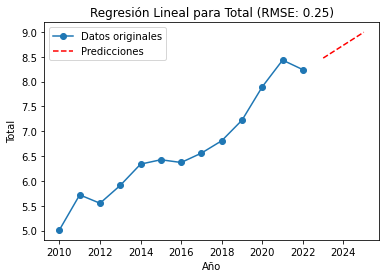

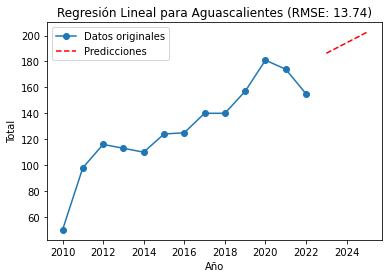

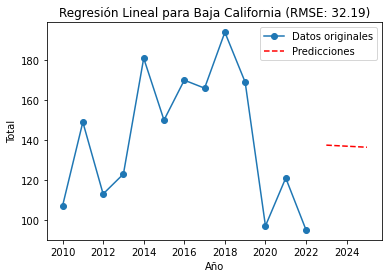

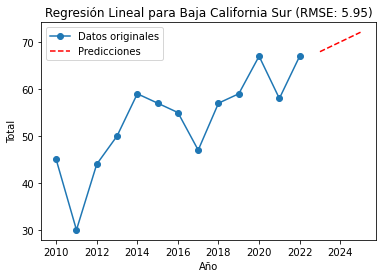

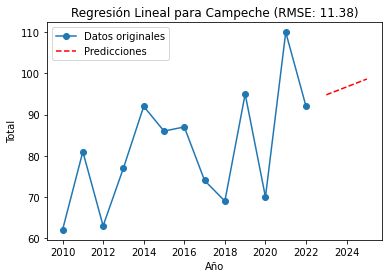

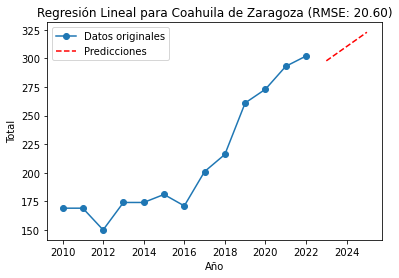

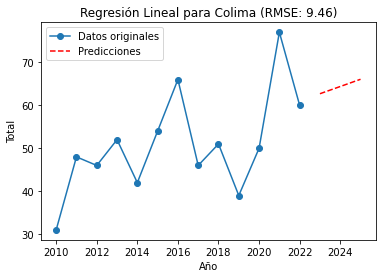

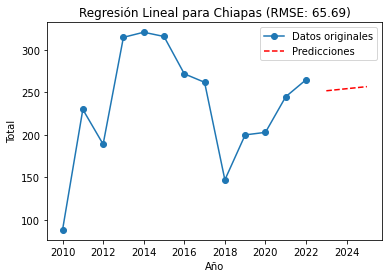

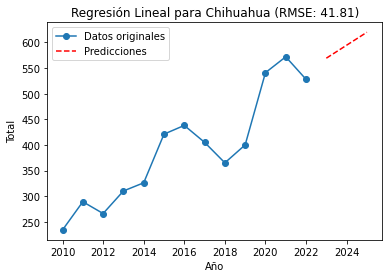

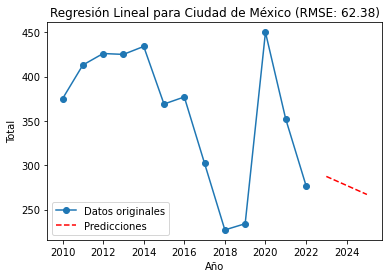

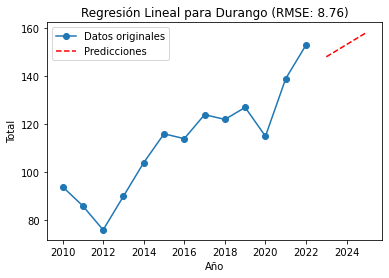

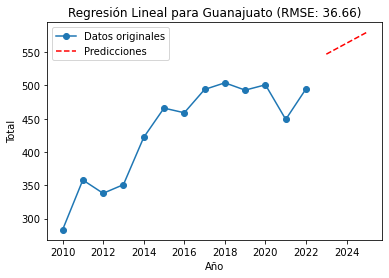

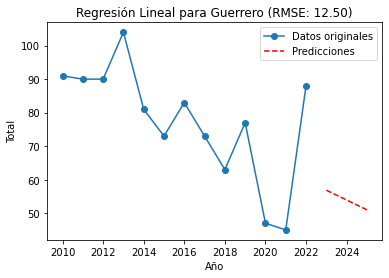

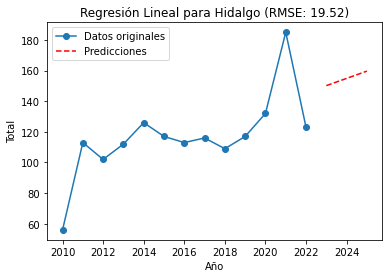

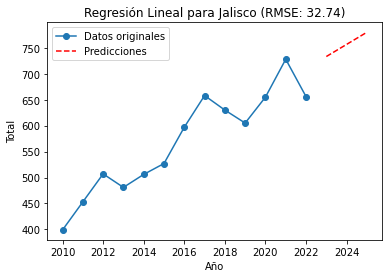

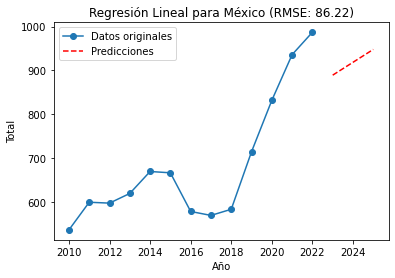

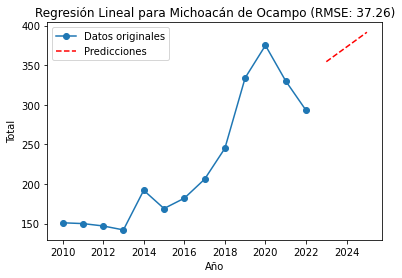

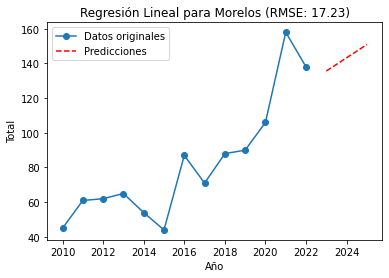

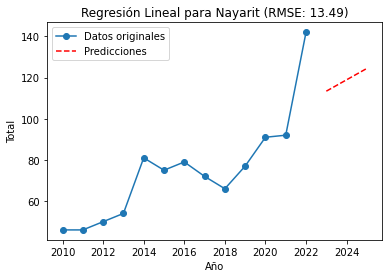

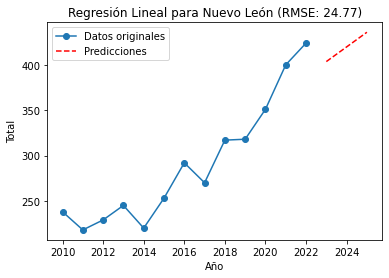

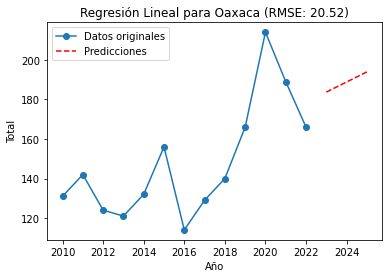

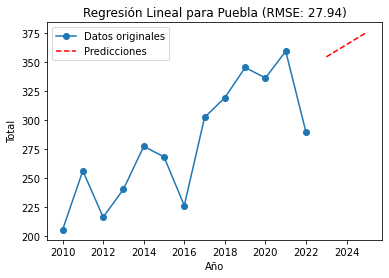

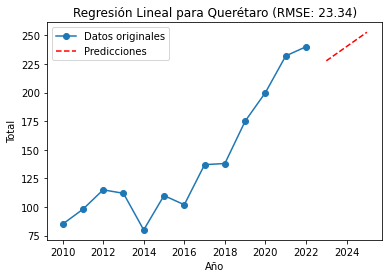

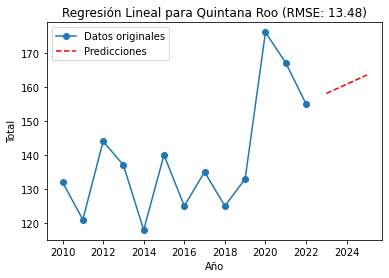

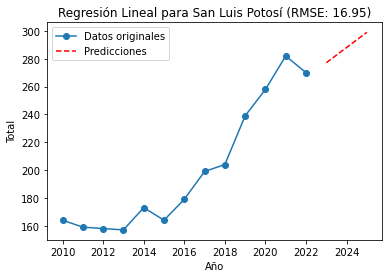

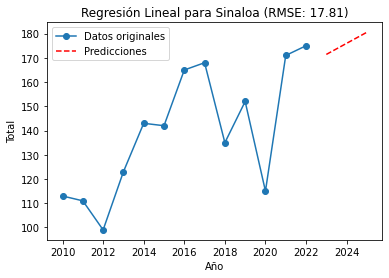

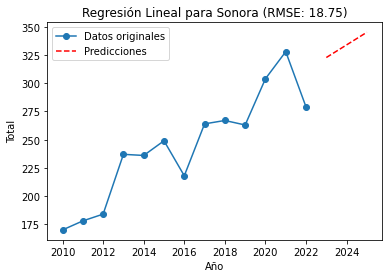

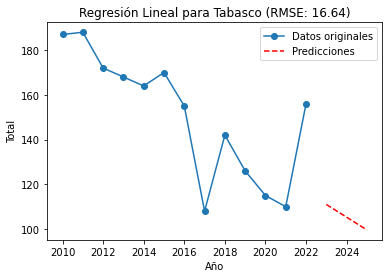

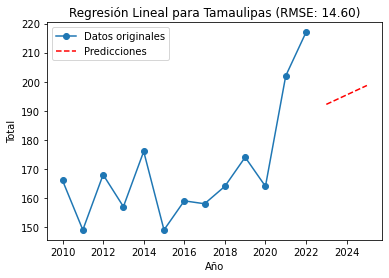

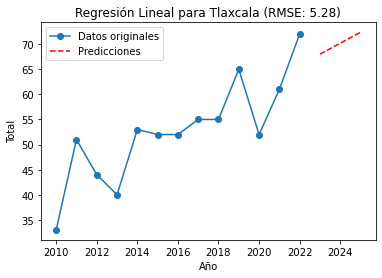

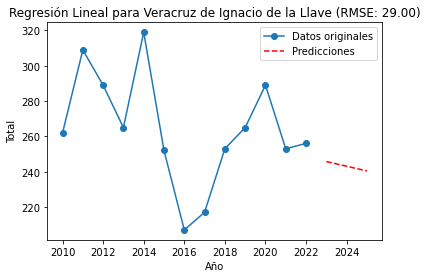

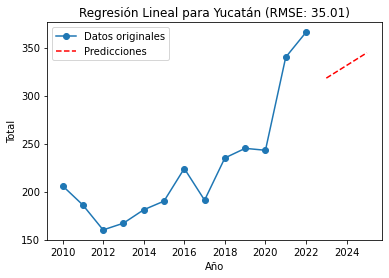

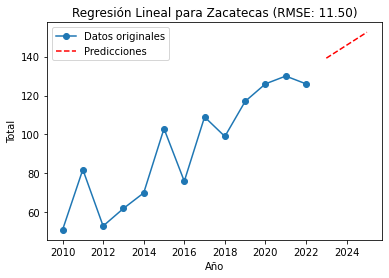

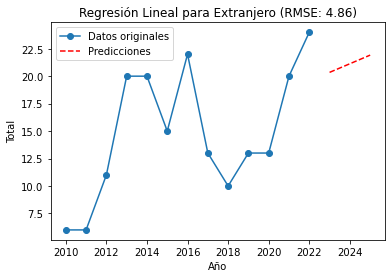

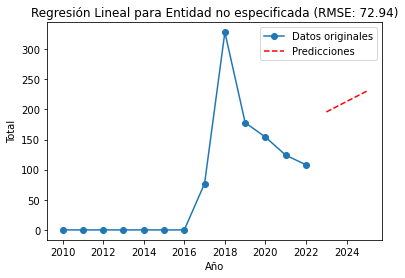

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Iterar sobre cada DataFrame para plotear y predecir
for name, df in filtered_dfs.items():
    # Convertir 'Periodo' a datetime y extraer el año como número
    df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y')
    df['Year_numeric'] = df['Periodo'].dt.year

    # Crear y entrenar el modelo de regresión lineal
    linear_reg = LinearRegression()
    X = df[['Year_numeric']]
    y = df['Total']
    linear_reg.fit(X, y)

    # Calcular las predicciones para datos históricos
    historical_predictions = linear_reg.predict(X)
    
    # Calcular el RMSE para datos históricos
    rmse = np.sqrt(mean_squared_error(y, historical_predictions))

    # Predecir para los próximos tres años
    future_years = pd.DataFrame({
        'Year_numeric': [2023, 2024, 2025]
    })
    future_predictions = linear_reg.predict(future_years)

    # Crear un DataFrame con las predicciones futuras
    predictions_df = pd.DataFrame({
        'Periodo': pd.to_datetime(future_years['Year_numeric'], format='%Y'),
        'Predicted_Total': future_predictions
    })

    # Crear el gráfico con RMSE
    plt.plot(df['Year_numeric'], df['Total'], marker='o', label='Datos originales')
    plt.plot(predictions_df['Periodo'].dt.year, predictions_df['Predicted_Total'], color='red', linestyle='--', label='Predicciones')
    plt.xlabel('Año')
    plt.ylabel('Total')
    plt.title(f'Regresión Lineal para {name} (RMSE: {rmse:.2f})')
    plt.legend()
    plt.show()


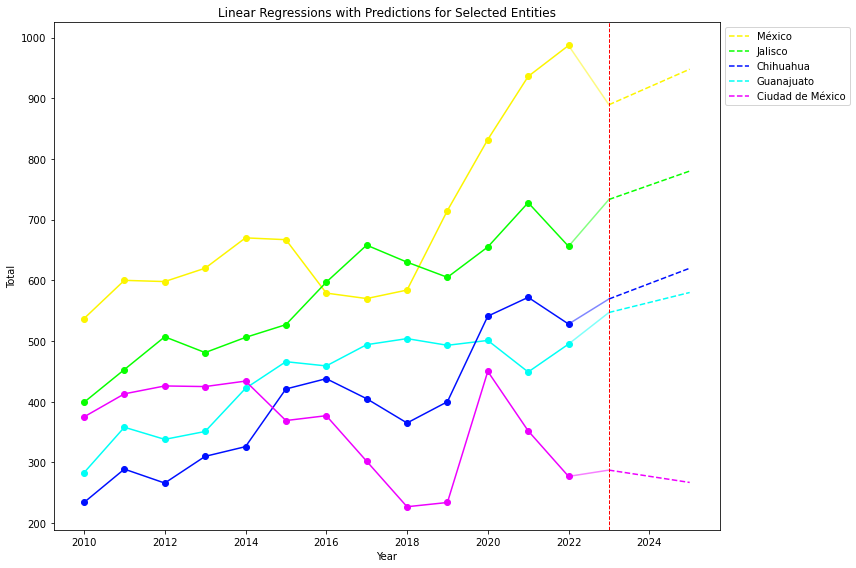

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

# List of all federal entities
all_entities = [
    "Total", "Aguascalientes", "Baja California", "Baja California Sur", "Campeche",
    "Coahuila de Zaragoza", "Colima", "Chiapas", "Chihuahua", "Ciudad de México",
    "Durango", "Guanajuato", "Guerrero", "Hidalgo", "Jalisco", "México",
    "Michoacán de Ocampo", "Morelos", "Nayarit", "Nuevo León", "Oaxaca", "Puebla",
    "Querétaro", "Quintana Roo", "San Luis Potosí", "Sinaloa", "Sonora", "Tabasco",
    "Tamaulipas", "Tlaxcala", "Veracruz de Ignacio de la Llave", "Yucatán", "Zacatecas",
    "Extranjero", "Entidad no especificada"
]

# List of the entities you want to analyze
filtered_entities = ["México","Jalisco","Guanajuato","Chihuahua","Ciudad de México"]

# Generate a color dictionary for each selected federal entity
palette = sns.color_palette("hsv", len(filtered_entities))
entity_colors = {entity: color for entity, color in zip(filtered_entities, palette)}

# Dictionary to store the final prediction values and their labels
prediction_values = {}

# Create a single plot to display multiple results
plt.figure(figsize=(12, 8))  # Plot size

# You should have a DataFrame 'filtered_dfs' with data for all entities
# Assuming you have a dictionary called 'filtered_dfs' with all DataFrames by entity

# Iterate over each DataFrame, filtering by the entities we want
for name in filtered_entities:
    df = filtered_dfs[name]  # Get the DataFrame for the selected entity

    # Get the corresponding color for the federal entity
    color = entity_colors.get(name, "black")

    # Convert 'Periodo' to datetime and extract the year as a number
    df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y')
    df['Year_numeric'] = df['Periodo'].dt.year

    # Create and train the linear regression model
    linear_reg = LinearRegression()
    X = df[['Year_numeric']]
    y = df['Total']
    linear_reg.fit(X, y)

    # Predict for the next three years
    future_years = pd.DataFrame({
        'Year_numeric': [2023, 2024, 2025]
    })
    future_predictions = linear_reg.predict(future_years)

    # Save the last prediction value to sort the legend
    prediction_values[name] = future_predictions[-1]  # Last prediction value

    # Create a DataFrame with future predictions
    predictions_df = pd.DataFrame({
        'Periodo': pd.to_datetime(future_years['Year_numeric'], format='%Y'),
        'Predicted_Total': future_predictions
    })

    # Add the original series and predictions to the plot using the same color
    plt.plot(df['Year_numeric'], df['Total'], marker='o', linestyle='-', color=color)
    plt.plot(predictions_df['Periodo'].dt.year, predictions_df['Predicted_Total'], linestyle='--', color=color, label=f'{name} - Predictions')

    # Connect the last historical data point with the first future prediction point
    plt.plot(
        [df['Year_numeric'].iloc[-1], predictions_df['Periodo'].dt.year.iloc[0]], 
        [df['Total'].iloc[-1], predictions_df['Predicted_Total'].iloc[0]], 
        linestyle='-', color=color, alpha=0.5
    )

# Sort the legend labels by prediction values
legend_labels = sorted(prediction_values.items(), key=lambda x: x[1], reverse=True)  # Sort by value

# Add the sorted legend to the plot
handles, _ = plt.gca().get_legend_handles_labels()  # Get the original handles
sorted_handles = [handles[[label[0] for label in legend_labels].index(name)] for name in prediction_values.keys()]  # Sort the handles

plt.legend(sorted_handles, [label[0] for label in legend_labels], loc='upper left', bbox_to_anchor=(1, 1))  # Sorted legend, placed outside the plotting area

# Add a vertical red line to indicate the year 2023
plt.axvline(x=2023, color='red', linestyle='--', linewidth=1, label='Start of Predictions (2023)')

# Plot configuration
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Linear Regressions with Predictions for Selected Entities')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Show the complete plot


In [38]:
### PRUEBA DE MAPA

In [39]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import folium
from folium.plugins import HeatMap

# Suponiendo que 'filtered_dfs' ya está definido con los DataFrames correspondientes

# Crear un diccionario para almacenar las predicciones finales
final_predictions = {}

# Lista de entidades filtradas
filtered_entities = ["México", "Jalisco", "Guanajuato", "Chihuahua", "Ciudad de México"]

# Coordenadas aproximadas de los estados (puedes ajustar según tus necesidades)
state_coords = {
    "México": [19.4326, -99.1332],
    "Jalisco": [20.6597, -103.3496],
    "Guanajuato": [21.0190, -101.6845],
    "Chihuahua": [28.6353, -106.0766],
    "Ciudad de México": [19.4326, -99.1332]
}

# Iterar sobre cada DataFrame para hacer las predicciones
for name in filtered_entities:
    df = filtered_dfs[name]
    df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y')
    df['Year_numeric'] = df['Periodo'].dt.year

    # Crear y entrenar el modelo de regresión lineal
    linear_reg = LinearRegression()
    X = df[['Year_numeric']]
    y = df['Total']
    linear_reg.fit(X, y)

    # Predecir para los próximos tres años
    future_years = pd.DataFrame({
        'Year_numeric': [2023, 2024, 2025]
    })
    future_predictions = linear_reg.predict(future_years)

    # Guardar la última predicción
    final_predictions[name] = future_predictions[-1]

# Crear un DataFrame con las predicciones finales
prediction_df = pd.DataFrame(list(final_predictions.items()), columns=['State', 'Prediction'])

# Crear el mapa base centrado en México
m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)

# Agregar las predicciones al mapa
for state, prediction in final_predictions.items():
    folium.Circle(
        location=state_coords[state],
        radius=50000,  # Ajustar el radio según sea necesario
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.6,
        popup=f"{state}: {prediction:.2f}"
    ).add_to(m)

# Guardar el mapa como un archivo HTML
m.save("mexico_heatmap.html")

# Mostrar el mapa
m


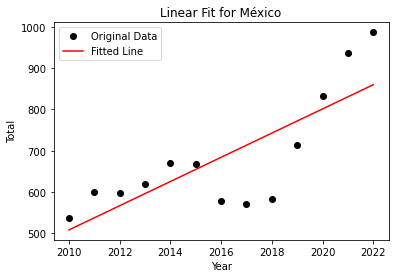

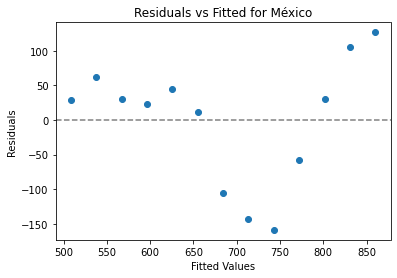

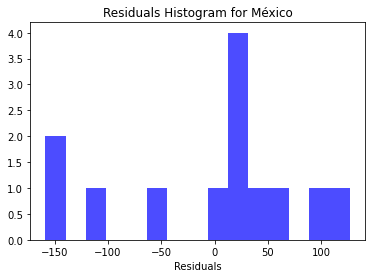

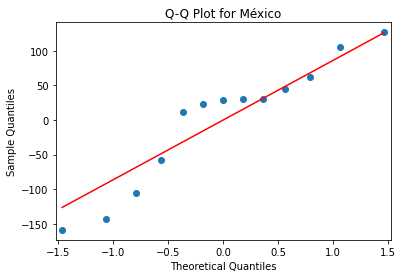

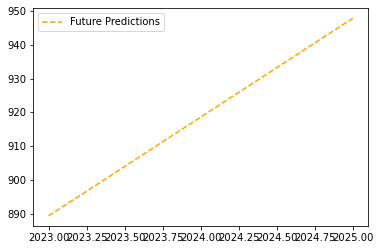

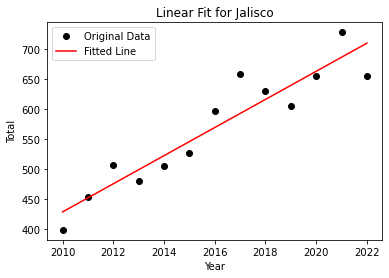

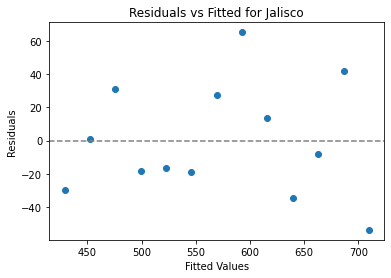

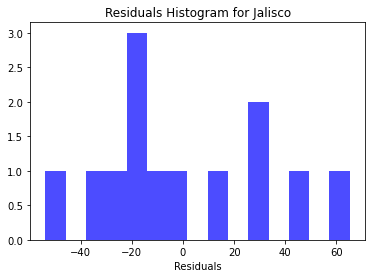

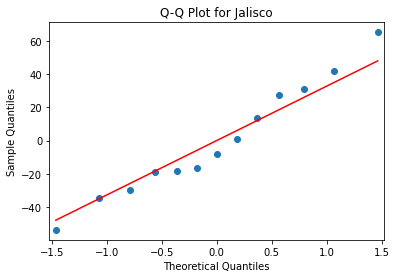

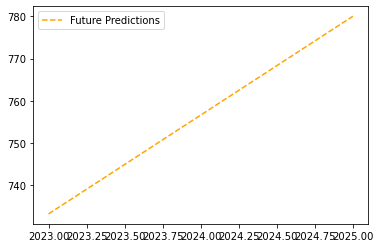

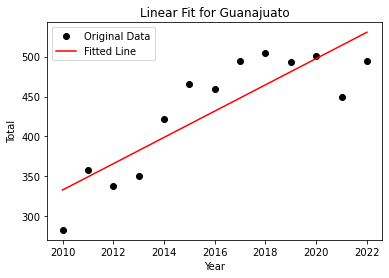

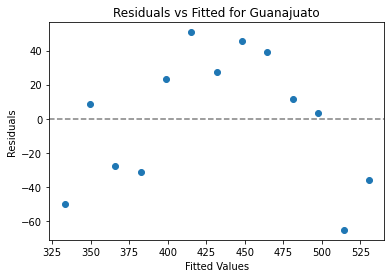

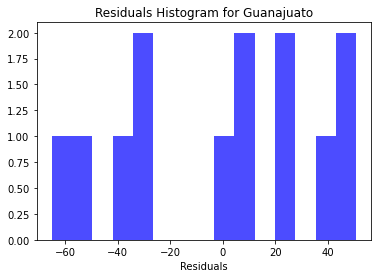

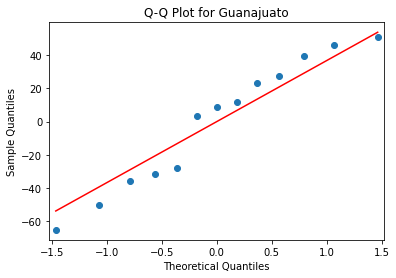

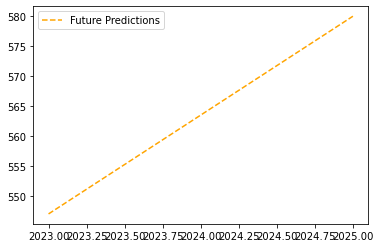

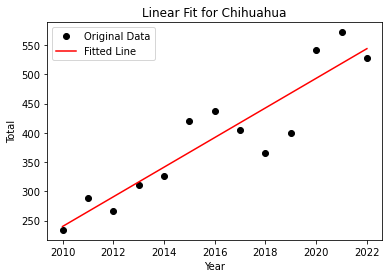

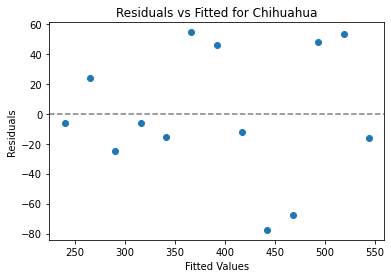

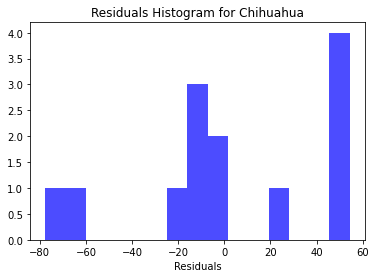

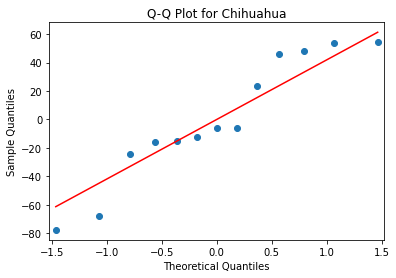

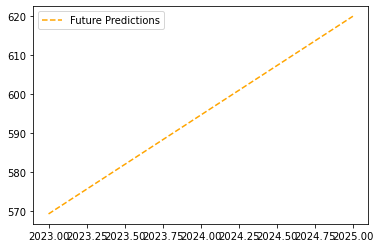

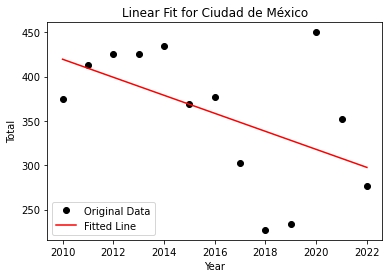

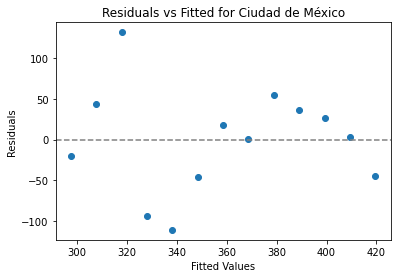

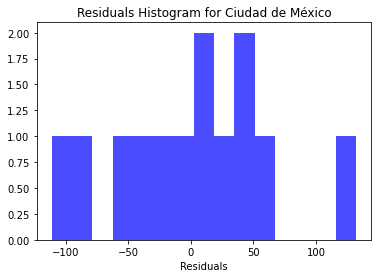

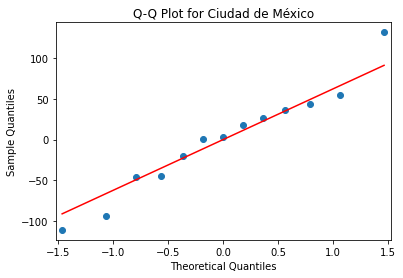

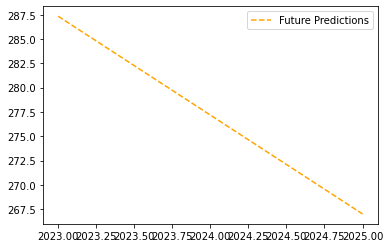

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm  # For additional statistical tests

# Create a dictionary to store residuals and fitted values for each entity
residuals_dict = {}

# Create a dictionary to store linear regression models for each entity
linear_reg_models = {}

# Create a DataFrame to store future predictions and corresponding years
future_years = pd.DataFrame({
    'Year_numeric': [2023, 2024, 2025]
})

# Iterate over each DataFrame to train models and calculate residuals
for name in filtered_entities:
    df = filtered_dfs[name]
    df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y')
    df['Year_numeric'] = df['Periodo'].dt.year

    # Normalize the data
    scaler = StandardScaler()
    X = scaler.fit_transform(df[['Year_numeric']])
    y = df['Total']

    # Train the linear regression model
    linear_reg = LinearRegression()
    linear_reg.fit(X, y)

    # Store the model and residuals
    linear_reg_models[name] = linear_reg
    y_pred = linear_reg.predict(X)
    residuals = y - y_pred
    residuals_dict[name] = residuals

    # Generate predictions for future years
    X_future = scaler.transform(future_years)
    future_predictions = linear_reg.predict(X_future)

    # Create the plot for original data and predictions
    plt.figure(figsize=(6, 4))
    plt.plot(df['Year_numeric'], df['Total'], 'o', label='Original Data', color='black')
    plt.plot(df['Year_numeric'], y_pred, '-', label='Fitted Line', color='red')
    plt.title(f'Linear Fit for {name}')
    plt.xlabel('Year')
    plt.ylabel('Total')
    plt.legend()
    plt.show()

    # Additional plots for checking assumptions
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals)
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Fitted for {name}')
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.show()

    # Histogram for residuals to check for normality
    plt.figure(figsize=(6, 4))
    plt.hist(residuals, bins=15, color='blue', alpha=0.7)
    plt.title(f'Residuals Histogram for {name}')
    plt.xlabel('Residuals')
    plt.show()

    # Q-Q plot to check for normality of residuals
    sm.qqplot(residuals, line='s')
    plt.title(f'Q-Q Plot for {name}')
    plt.show()

    # Future predictions plot
    predictions_df = pd.DataFrame({
        'Periodo': pd.to_datetime(future_years['Year_numeric'], format='%Y'),
        'Predicted_Total': future_predictions
    })
    
    plt.plot(predictions_df['Periodo'].dt.year, predictions_df['Predicted_Total'], '--', color='orange', label='Future Predictions')
    plt.legend()
    plt.show()


In [42]:
import pandas as pd
import numpy as np

# Definir las características de los datos
np.random.seed(0)

# Crear un dataframe con 1000 individuos
n_samples = 1000

data = {
    'Age': np.random.randint(15, 80, n_samples),
    'Gender': np.random.choice(['Male', 'Female', 'Other'], n_samples, p=[0.48, 0.48, 0.04]),
    'MentalHealthHistory': np.random.choice(['None', 'Mild', 'Moderate', 'Severe'], n_samples, p=[0.4, 0.3, 0.2, 0.1]),
    'SubstanceAbuse': np.random.choice(['None', 'Alcohol', 'Drugs', 'Both'], n_samples, p=[0.5, 0.3, 0.15, 0.05]),
    'EconomicStatus': np.random.choice(['Low', 'Medium', 'High'], n_samples, p=[0.3, 0.5, 0.2]),
    'SocialSupport': np.random.choice(['Low', 'Medium', 'High'], n_samples, p=[0.3, 0.4, 0.3]),
    'PreviousSuicideAttempts': np.random.randint(0, 5, n_samples),
    'FamilyHistory': np.random.choice(['None', 'MentalIllness', 'Suicide'], n_samples, p=[0.7, 0.2, 0.1]),
    'StressfulLifeEvents': np.random.randint(0, 10, n_samples)
}

df = pd.DataFrame(data)

# Mapear las características categóricas a valores numéricos
mental_health_map = {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}
substance_abuse_map = {'None': 0, 'Alcohol': 1, 'Drugs': 1, 'Both': 2}
economic_status_map = {'Low': 2, 'Medium': 1, 'High': 0}
social_support_map = {'Low': 2, 'Medium': 1, 'High': 0}
family_history_map = {'None': 0, 'MentalIllness': 1, 'Suicide': 2}

df['MentalHealthHistory'] = df['MentalHealthHistory'].map(mental_health_map)
df['SubstanceAbuse'] = df['SubstanceAbuse'].map(substance_abuse_map)
df['EconomicStatus'] = df['EconomicStatus'].map(economic_status_map)
df['SocialSupport'] = df['SocialSupport'].map(social_support_map)
df['FamilyHistory'] = df['FamilyHistory'].map(family_history_map)

# Crear la variable objetivo 'SuicideProbability' basada en una fórmula ponderada
def calculate_suicide_probability(row):
    score = (
        0.3 * row['MentalHealthHistory'] +
        0.2 * row['SubstanceAbuse'] +
        0.1 * row['EconomicStatus'] +
        0.1 * row['SocialSupport'] +
        0.2 * row['PreviousSuicideAttempts'] +
        0.1 * row['FamilyHistory'] +
        0.1 * row['StressfulLifeEvents']
    )
    
    # Convertir la puntuación a una probabilidad entre 0 y 1
    probability = 1 / (1 + np.exp(-score))  # Función sigmoide
    return probability

df['SuicideProbability'] = df.apply(calculate_suicide_probability, axis=1)

df

,Age,Gender,MentalHealthHistory,SubstanceAbuse,EconomicStatus,SocialSupport,PreviousSuicideAttempts,FamilyHistory,StressfulLifeEvents,SuicideProbability
0,59,Male,0,0,1,0,4,2,4,0.817574
1,62,Male,0,0,1,1,3,0,7,0.817574
2,79,Female,1,0,0,0,0,0,6,0.710950
3,24,Female,0,0,1,1,4,0,5,0.817574
4,36,Female,0,0,2,2,1,0,4,0.731059
...,...,...,...,...,...,...,...,...,...,...
995,65,Female,1,1,1,0,0,1,3,0.731059
996,68,Male,1,1,1,1,4,0,7,0.900250
997,25,Male,1,0,0,1,2,0,4,0.768525
998,58,Female,1,0,1,0,2,1,7,0.832018
